
# Problem statement - Identify fraudulent credit card transactions.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Make your machine learning model learn to detect these anomalous transactions


In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
train = pd.read_csv('creditcard.csv')

# Data Analysis

In Data Analysis We will Analyze To Find out the below points
* Categorical Variables
* Cardinality of Categorical Variables 
* Missing Values
* Data Unbalance
* Handling Imbalanced Data
* Univariant analysis of all The Numerical Variables
* Distribution of the Numerical Variables
* Feature Correlation
* Outliers
* Relationship between independent and dependent feature


In [3]:
# print shape of dataset with rows and columns
print(train.shape)

(284807, 31)


In [4]:
# print the top5 records
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# to print the full summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O' or train[feature].dtypes== 'int64']
print(categorical_features)

['Class']


In our dataset we have only one categorical features '**Class**' , k is the original number of unique values in your data column. High cardinality means a lot of unique values ( a large k). A column with hundreds of zip codes is an example of a high cardinality feature. High cardinality theme bird. High dimensionality means a matrix with many dimensions. So we don't have high cardinality present in the dataset.

In [7]:
discrete_feature=[feature for feature in train.columns if len(train[feature].unique())<25 and feature not in ['Class']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


I checked if any column is having more than 25 unique values so we classified it as discrete feature, But it seem that we have only continous values only.

In [8]:
# step make the list of features which has missing values
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
# print the missing features list
print(len(features_with_na))

0


We don't have any missing values 

#Data Unbalance

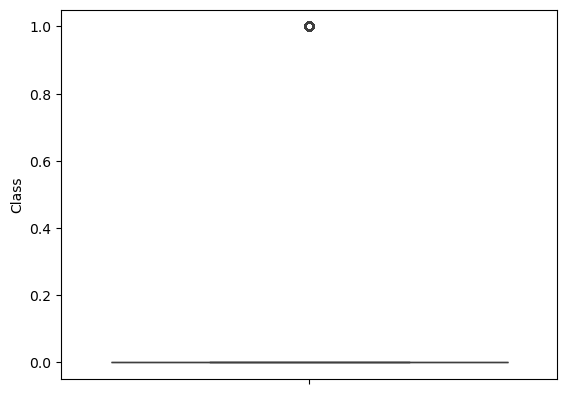

Percent of fraud transaction:  0.1727485630620034 %
Percent of normal transaction:  99.82725143693798 %


In [9]:
sns.boxplot(train['Class'])
plt.show()
print('Percent of fraud transaction: ',len(train[train['Class']==1])/len(train['Class'])*100,"%")
print('Percent of normal transaction: ',len(train[train['Class']==0])/len(train['Class'])*100,"%")

Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

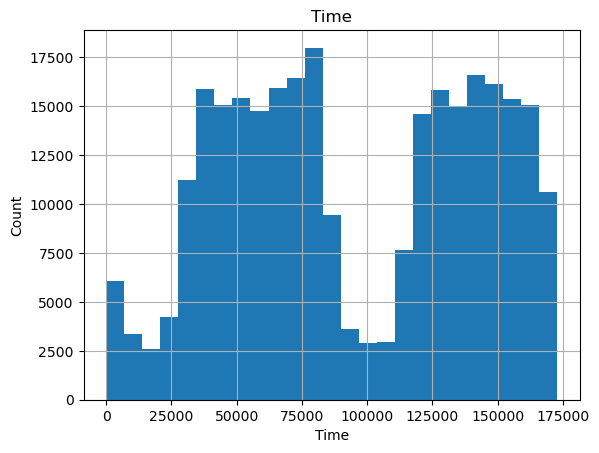

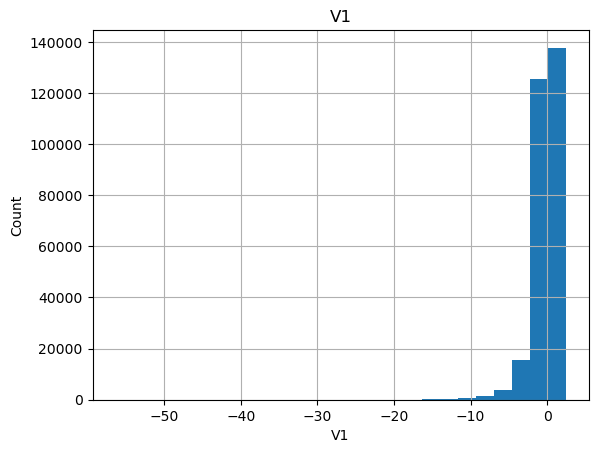

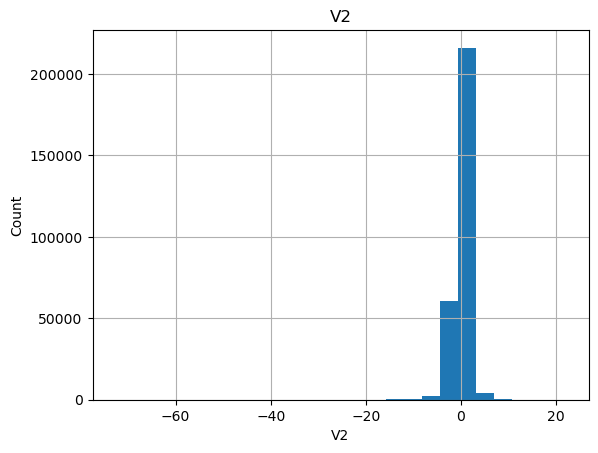

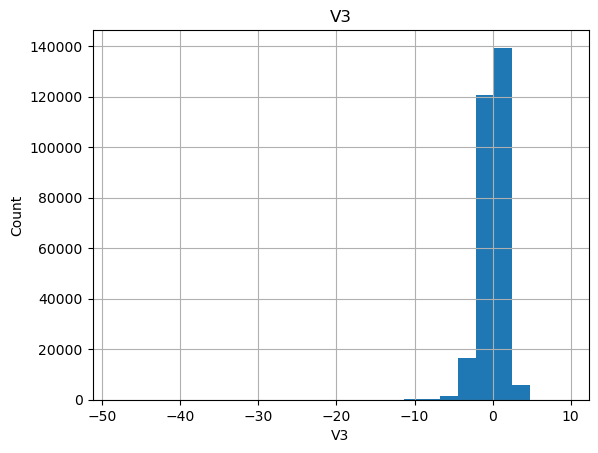

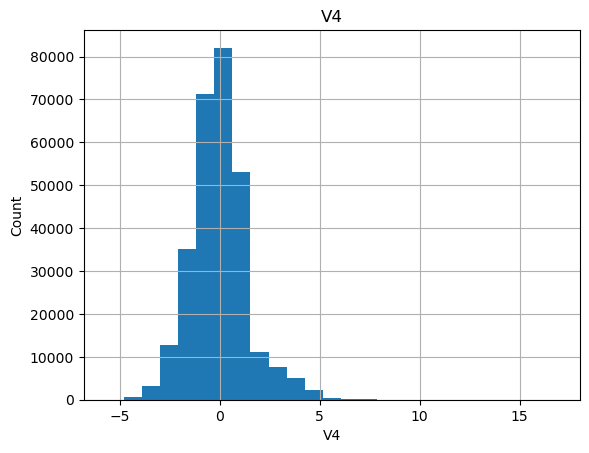

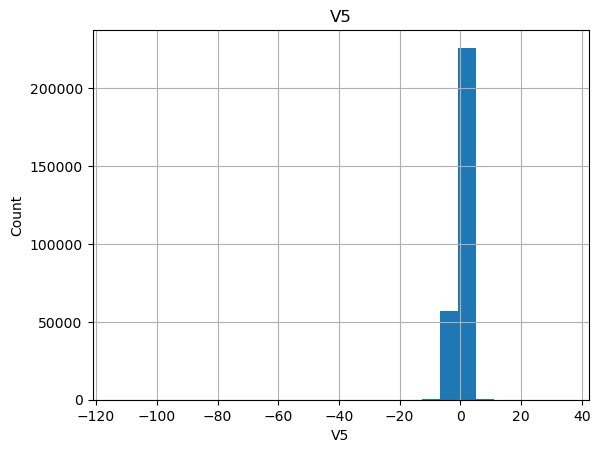

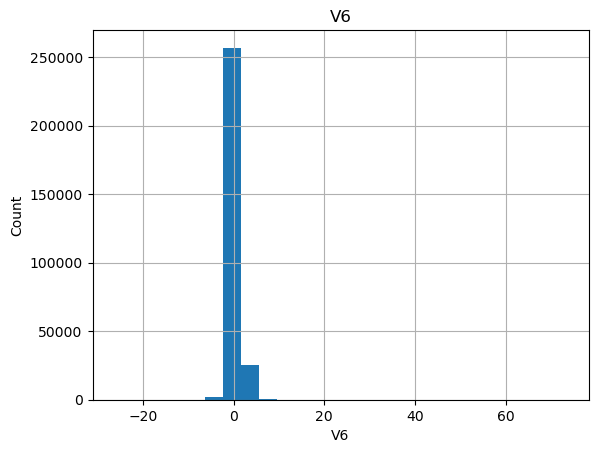

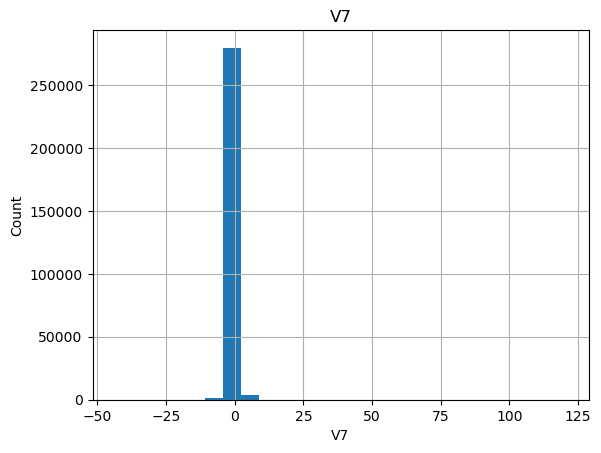

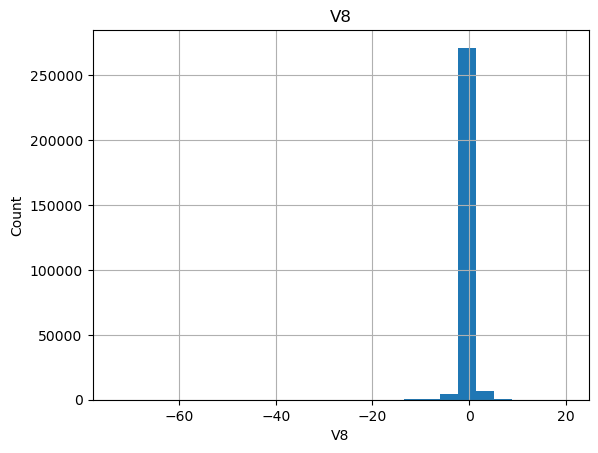

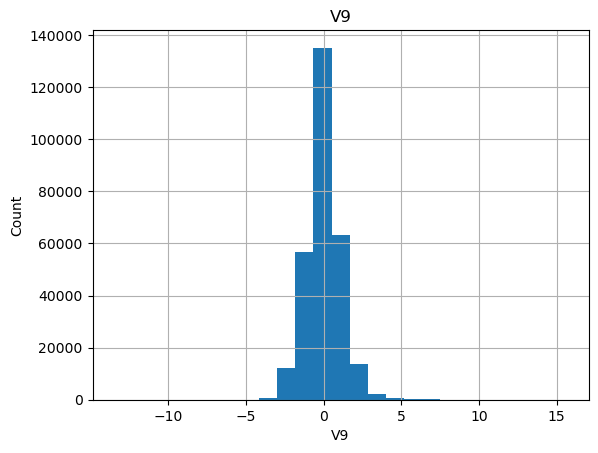

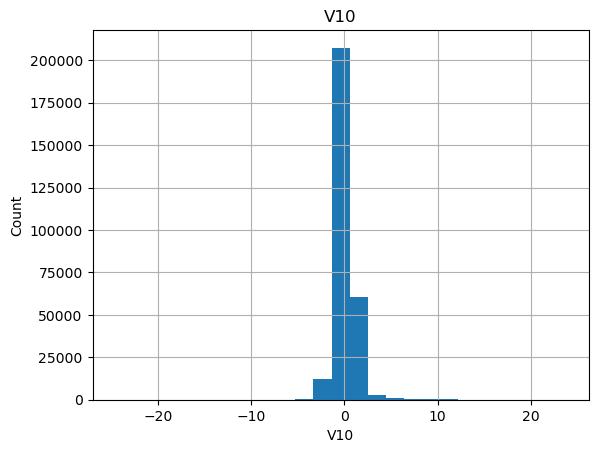

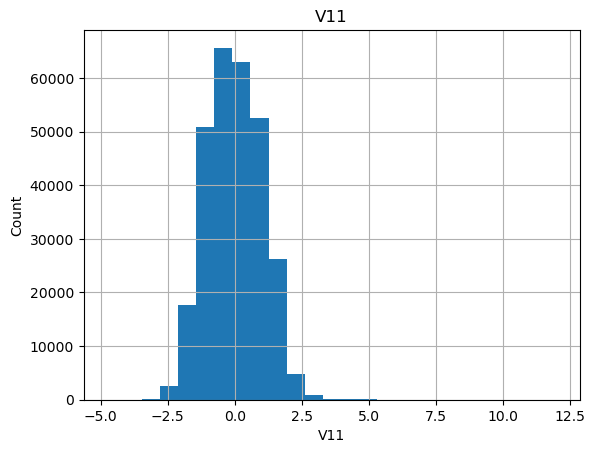

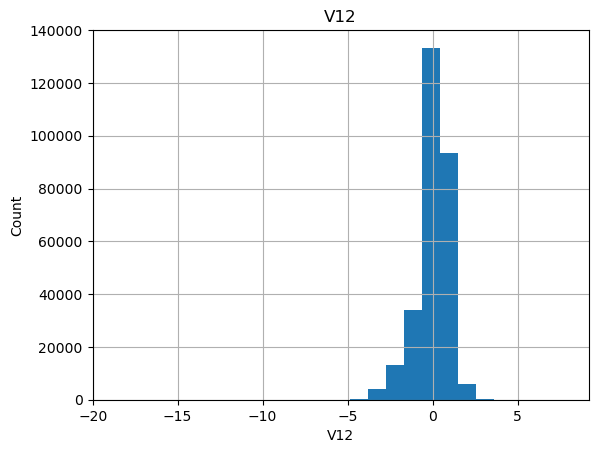

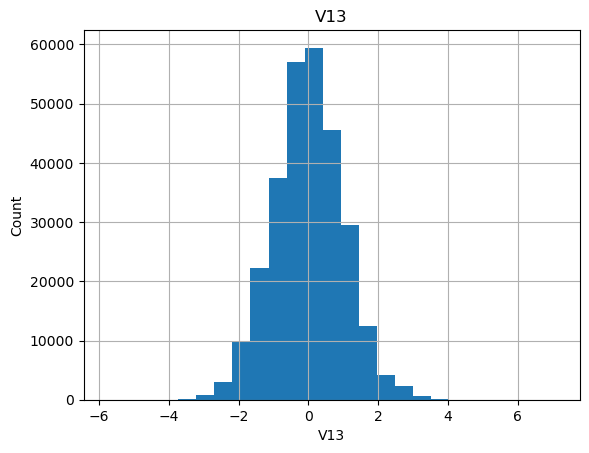

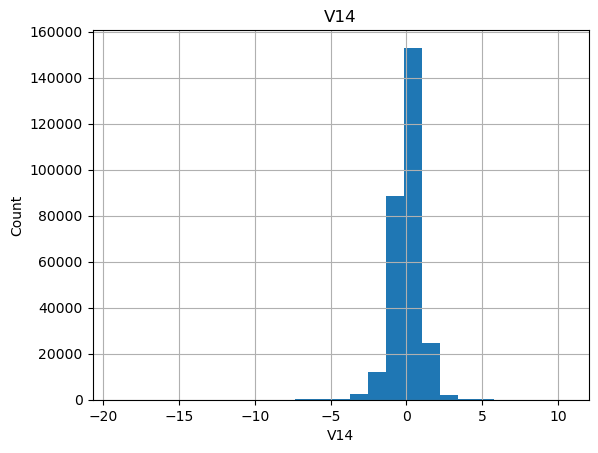

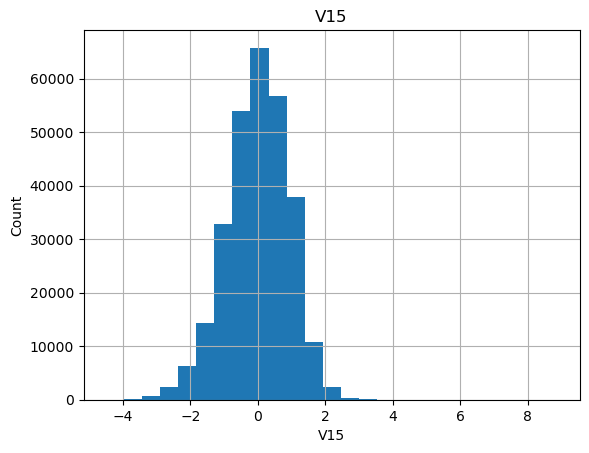

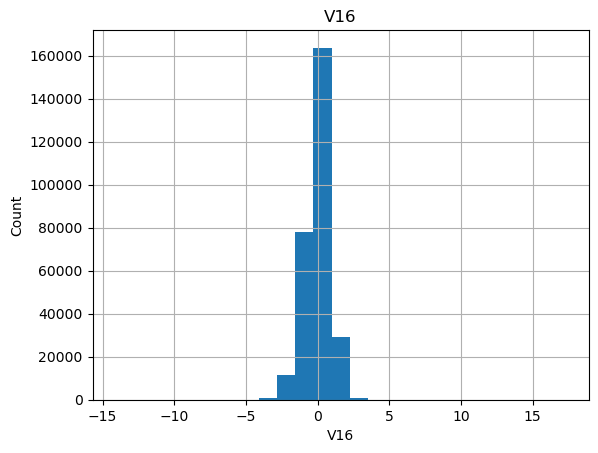

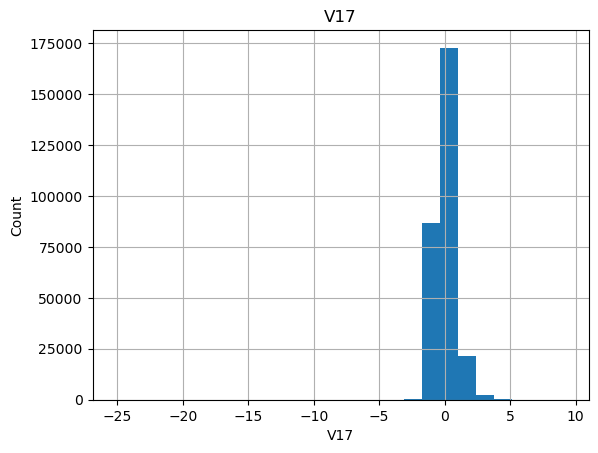

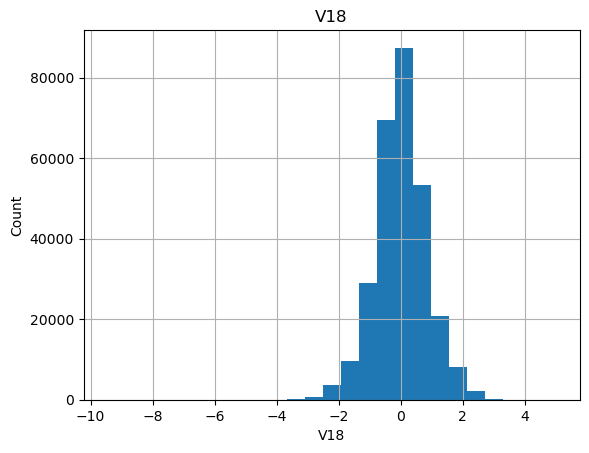

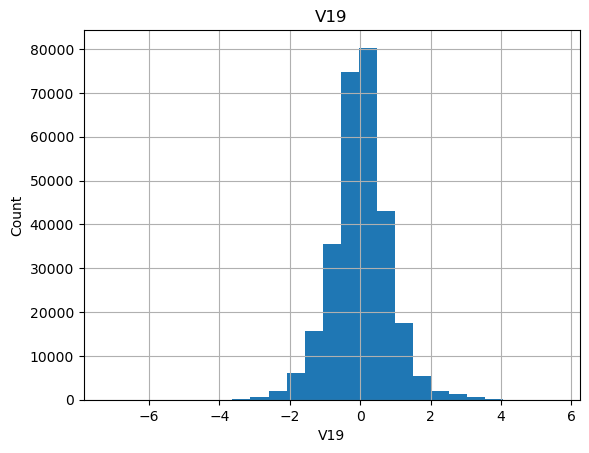

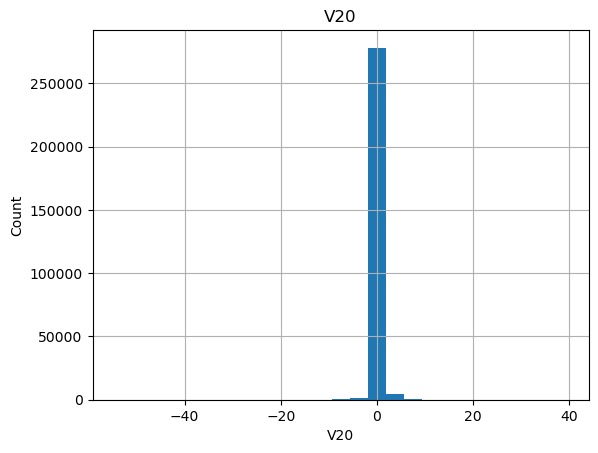

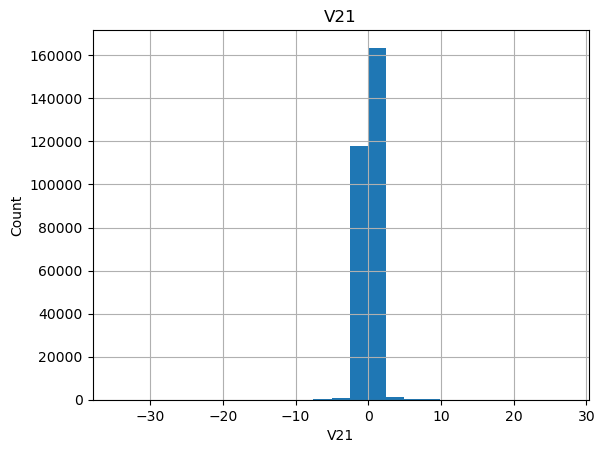

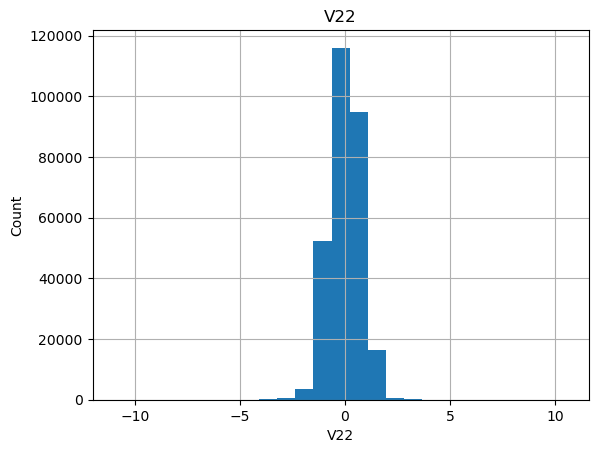

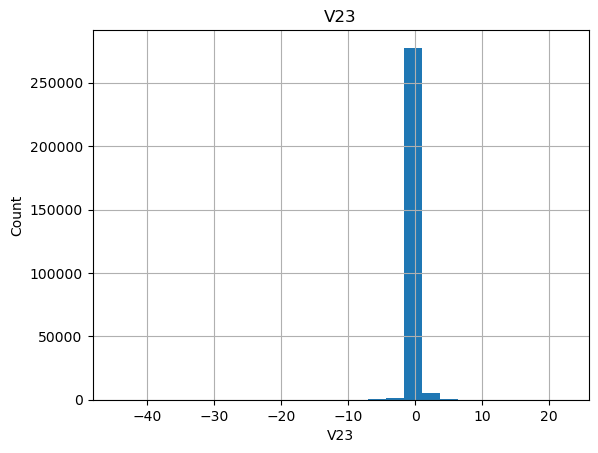

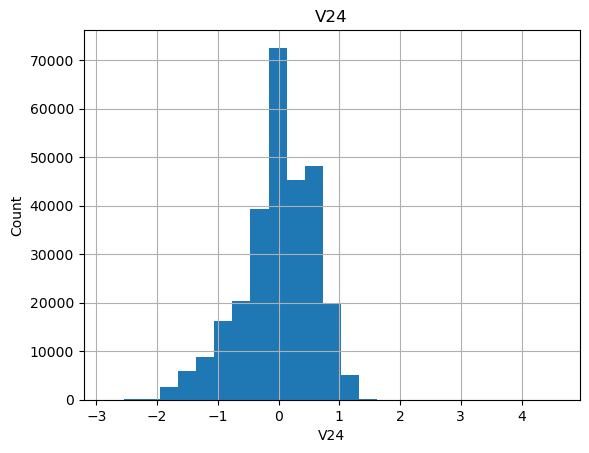

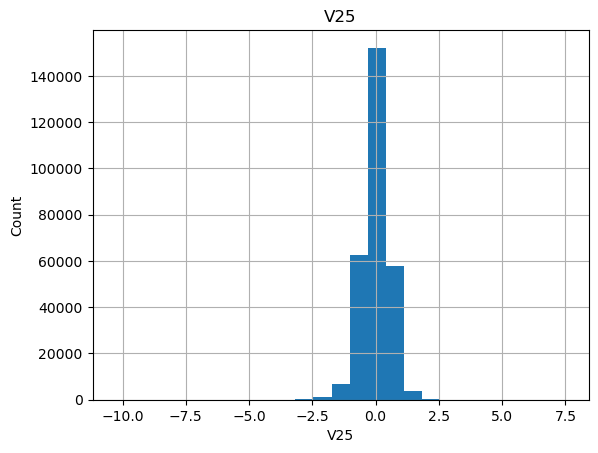

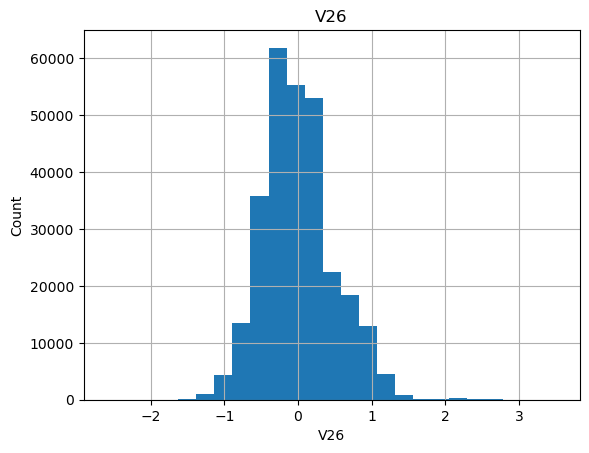

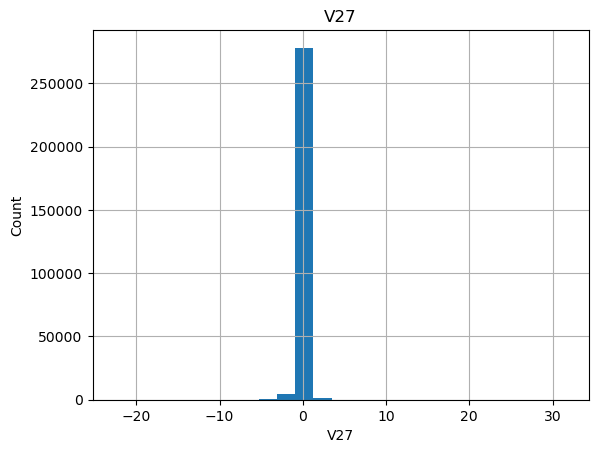

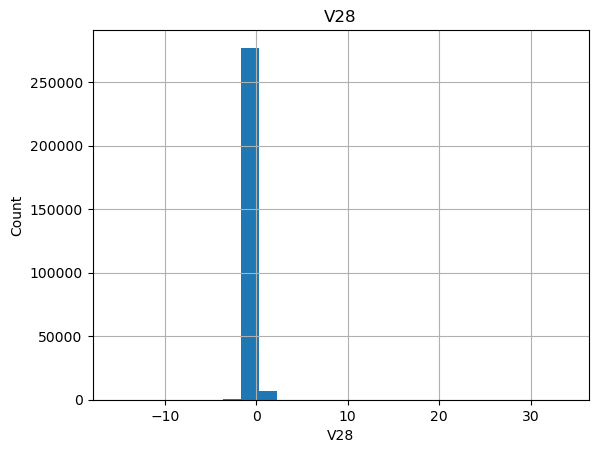

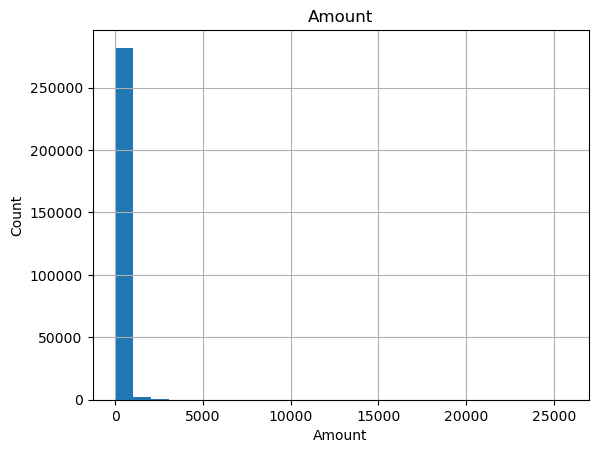

In [10]:
# Lets analyse the continuous values by creating histograms to understand the distribution
data=train.copy()
data.drop(columns='Class', inplace = True)

for feature in data.columns:
 
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Normalization is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance.

since V1, V2, … V28 are the principal components obtained with PCA we can clearly see that from above plot that from V1 to V28 variables are normalized. Variable 'Time' and 'Amount' is not normalized.

In [11]:
#figure_factory module contains dedicated functions for creating very specific types of plots
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
class_0 = train.loc[train['Class'] == 0]["Time"]
class_1 = train.loc[train['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

**Credit Card Transactions Time Density Plot** visualises the distribution of '**Not Fraud**' and '**Fraud**' transaction over a continuous interval or time period. 

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time.

So 'Time' feature can't tell whether the trasaction is Fraudulent transactions or not.

#Features correlation

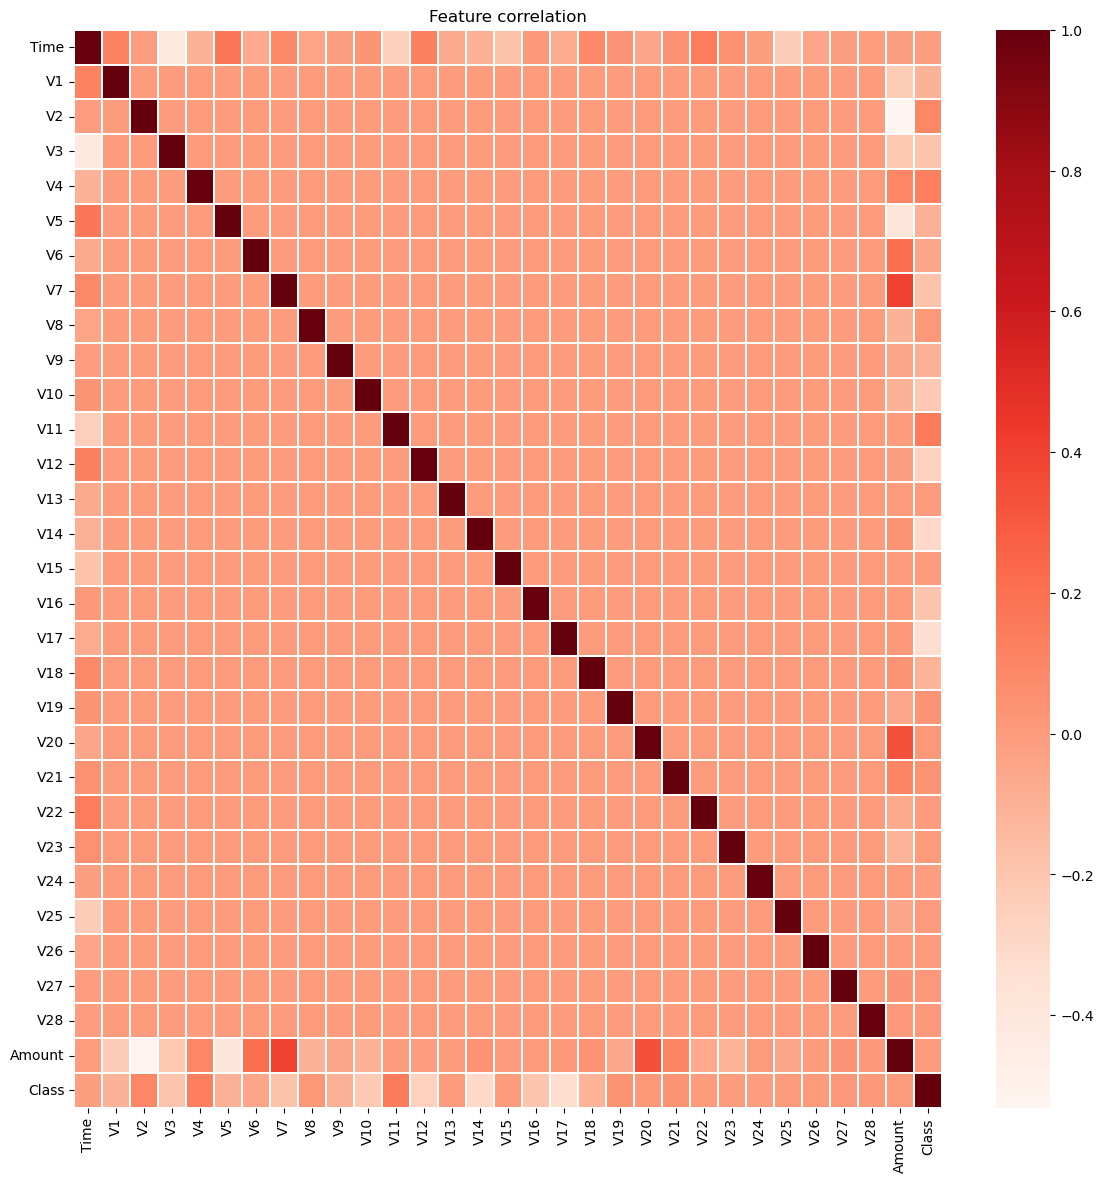

In [12]:
plt.figure(figsize = (14,14))
plt.title('Feature correlation')
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Correlation is **Positive** when the values **increase together**, and Correlation is **Negative** when one value **decreases as the other increases**

Correlation can have a value:

* 1 is a perfect positive correlation (between 'Amount' and V7, 'Amount' And 'V20')
* 0 is no correlation (**between features V1-V28**)
* -1 is a perfect negative correlation (between 'Time' and V3, 'Amount' and V2, 'Amount' and V5)

# Outliers

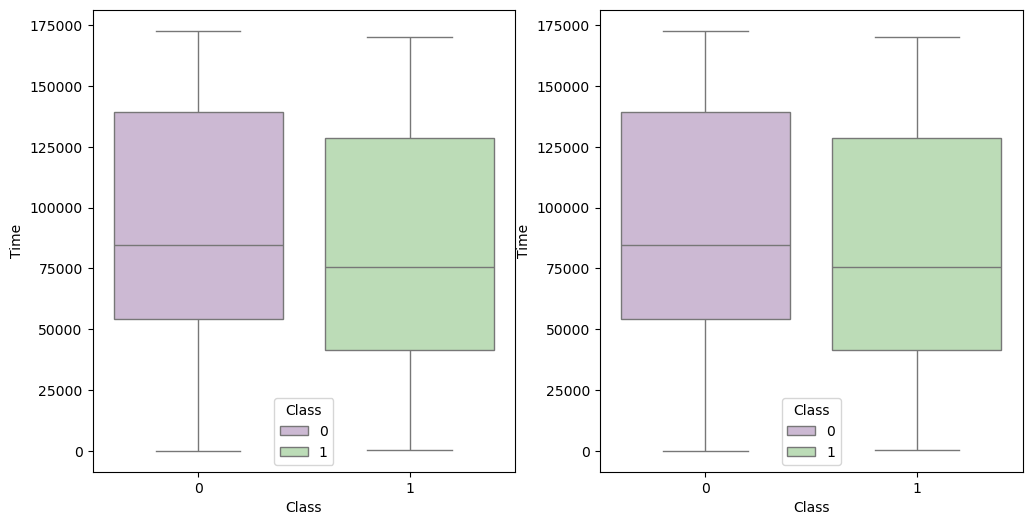

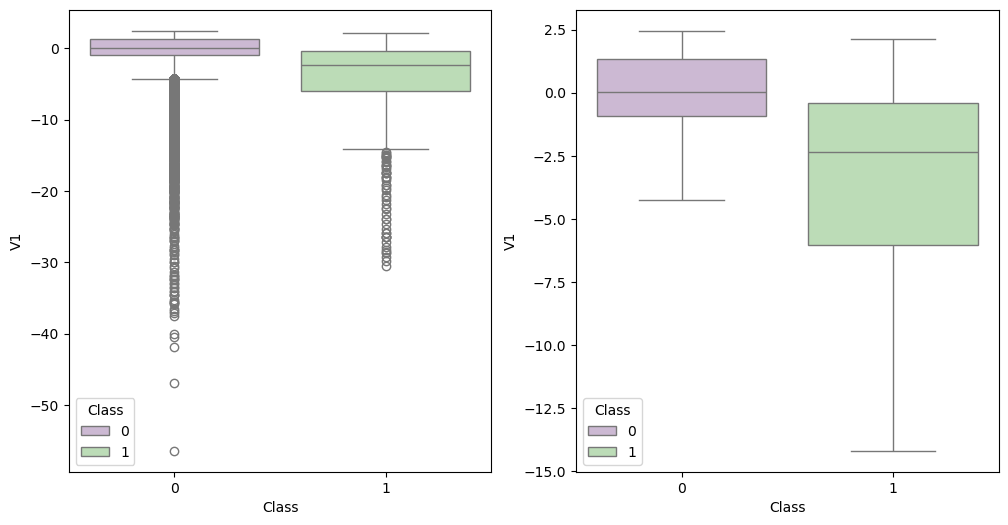

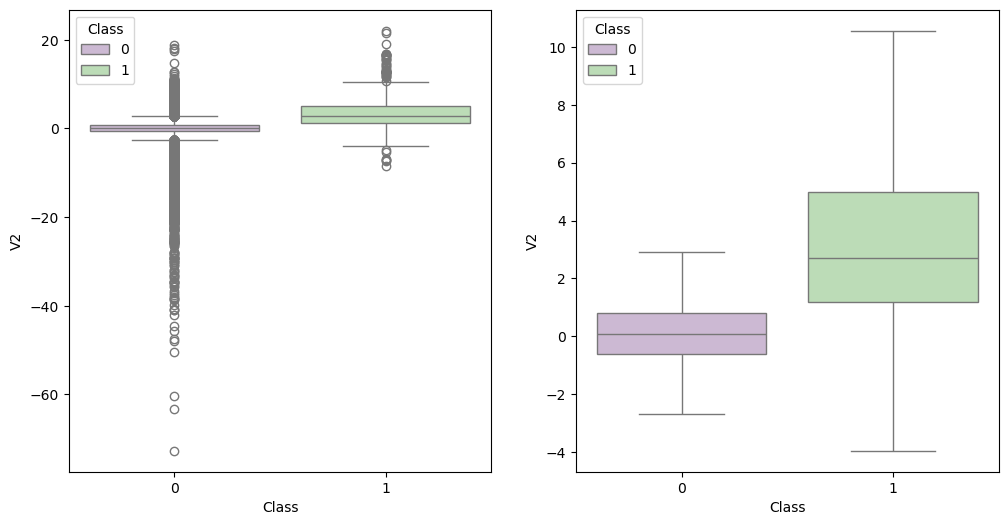

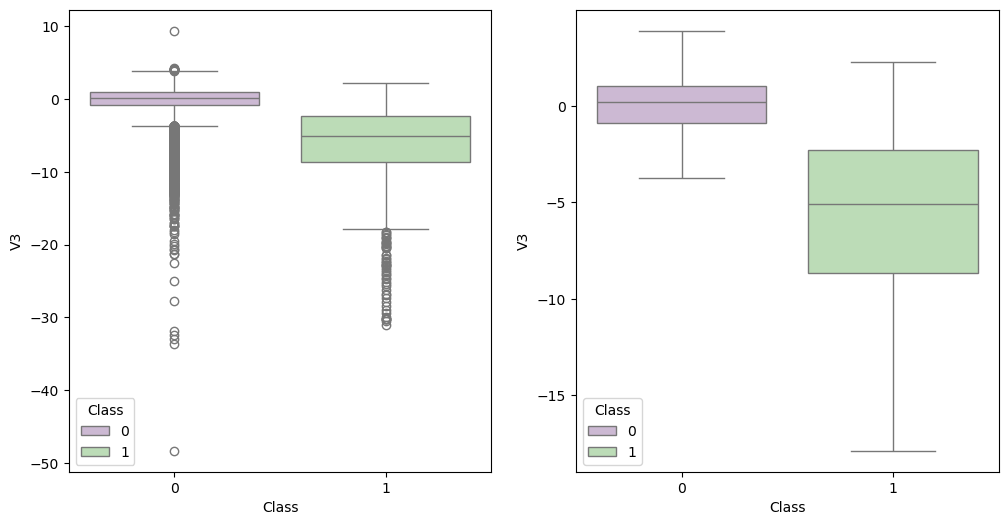

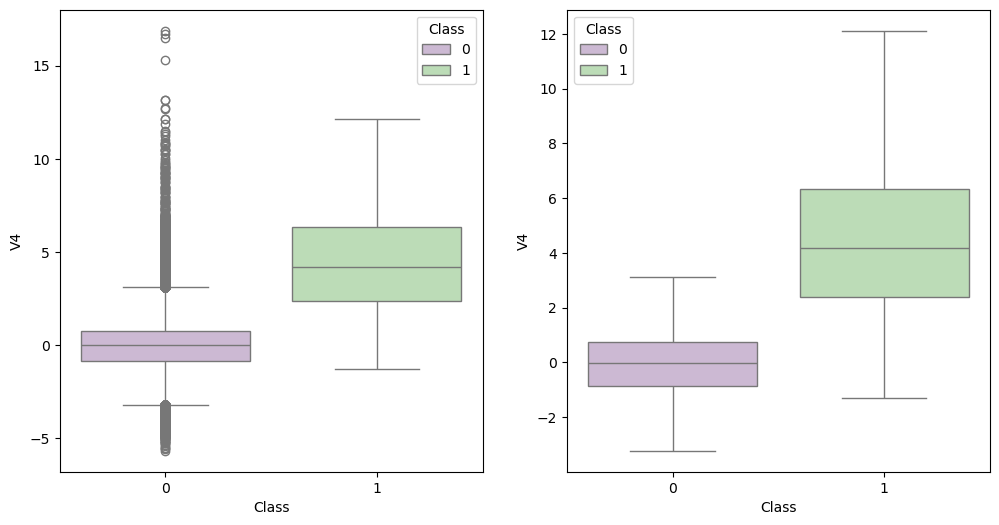

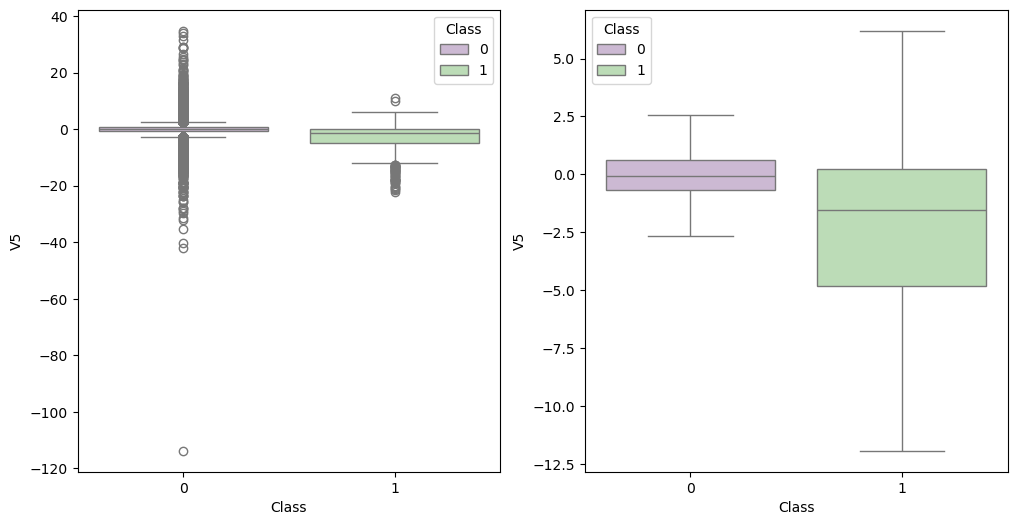

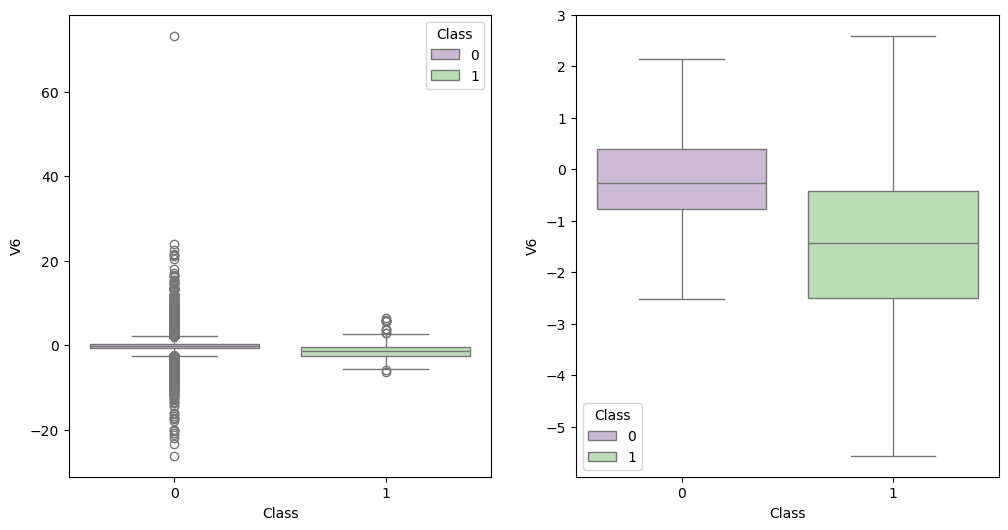

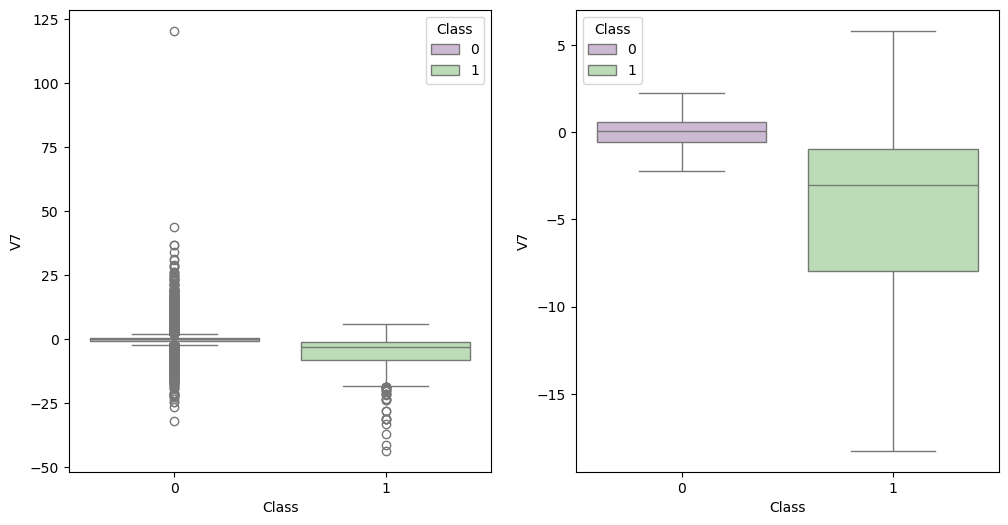

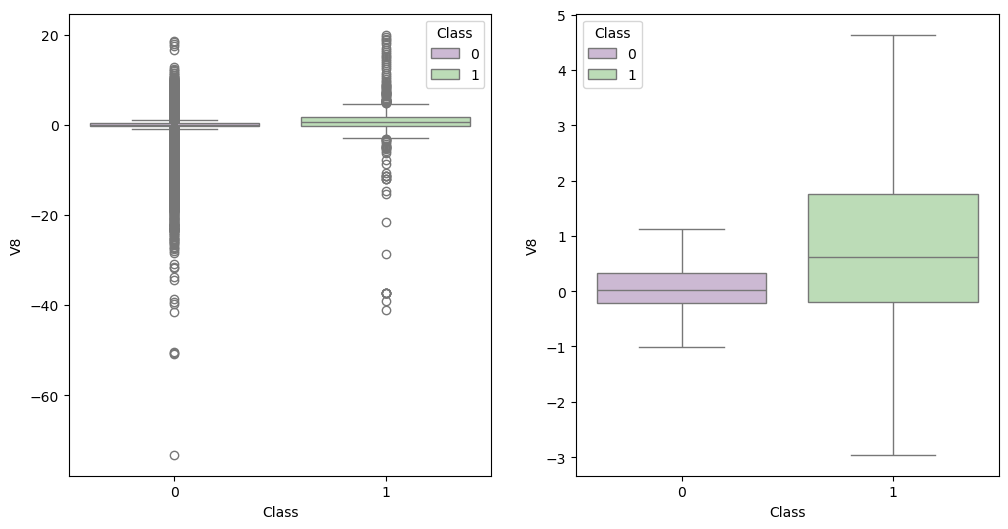

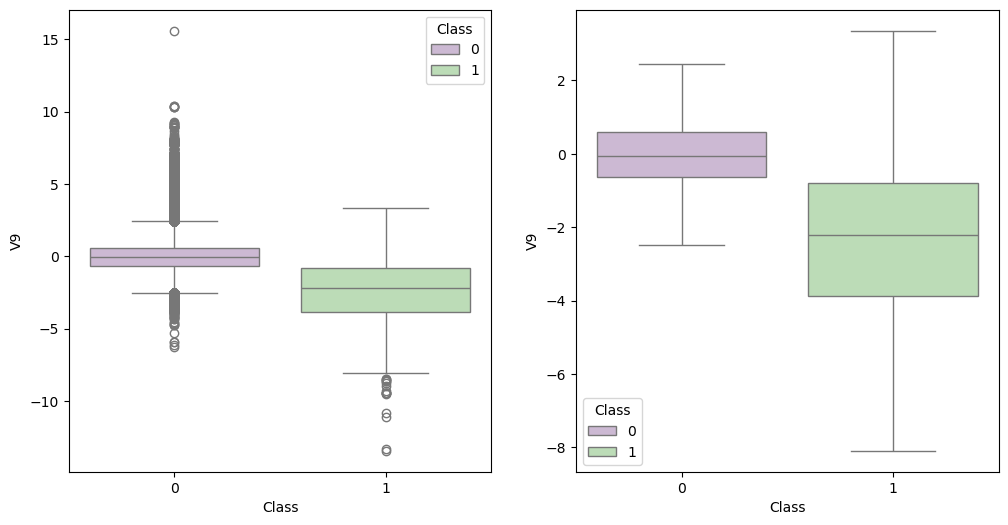

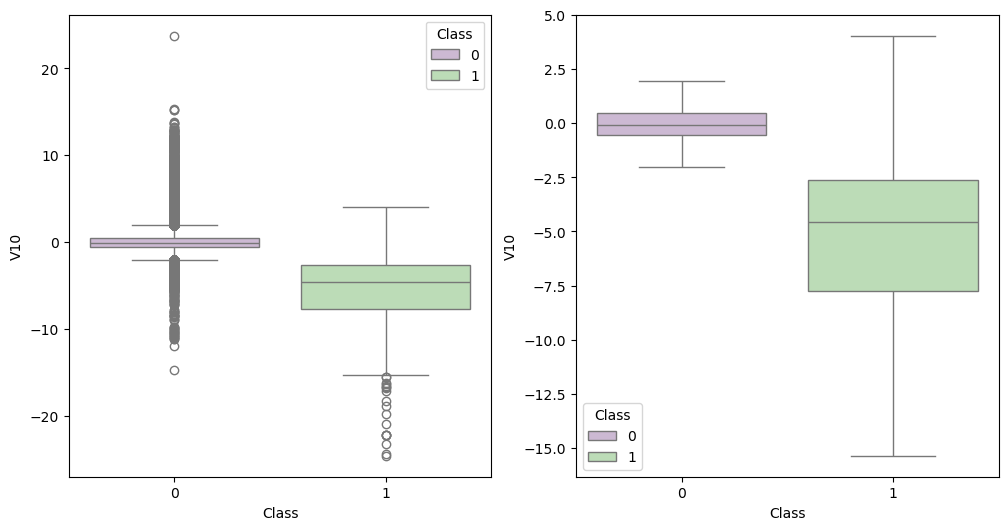

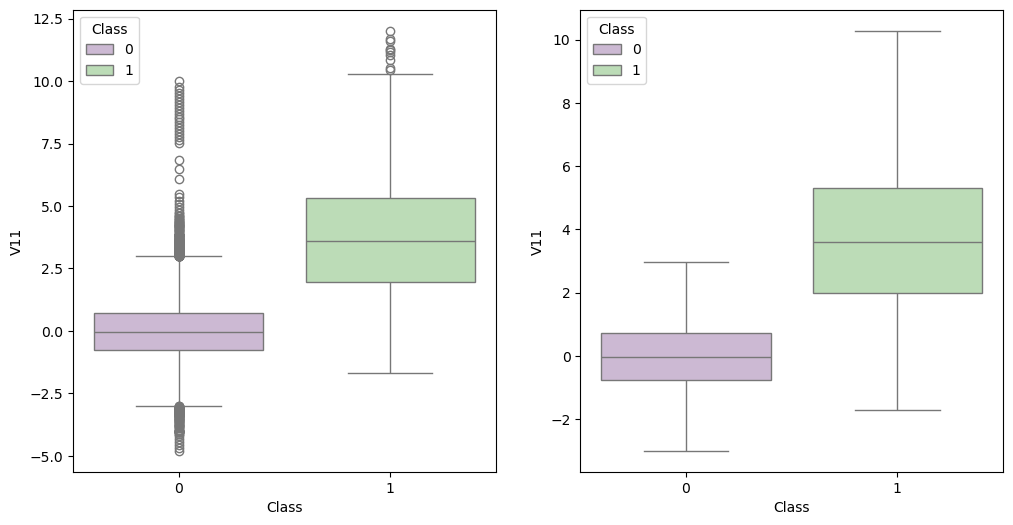

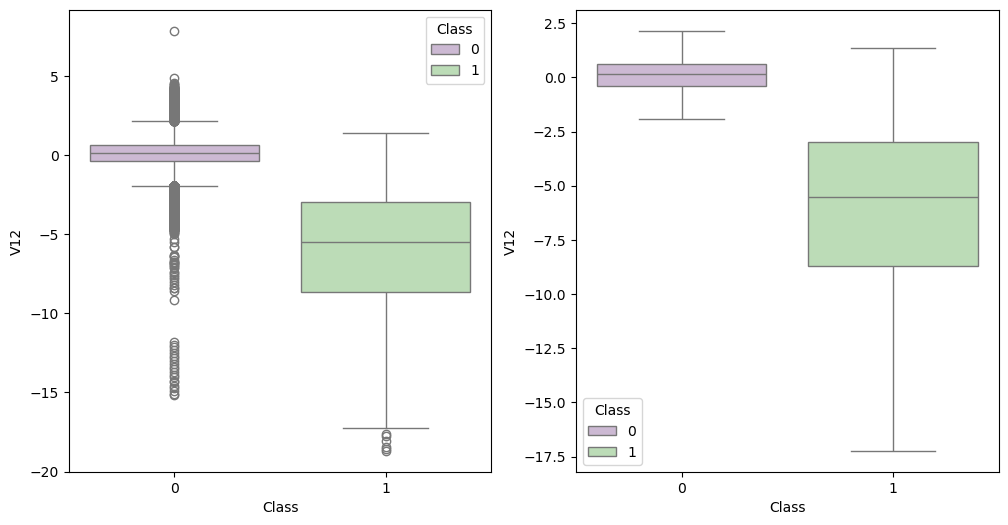

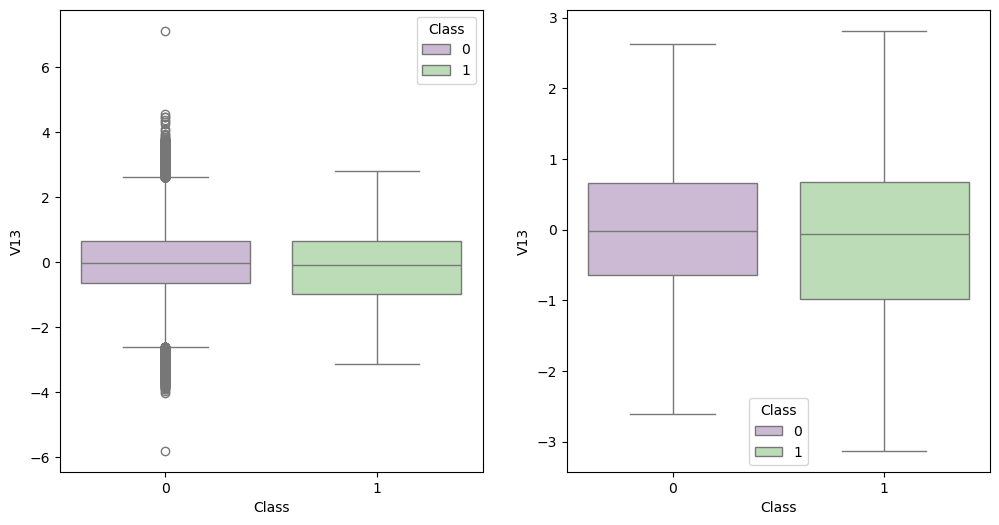

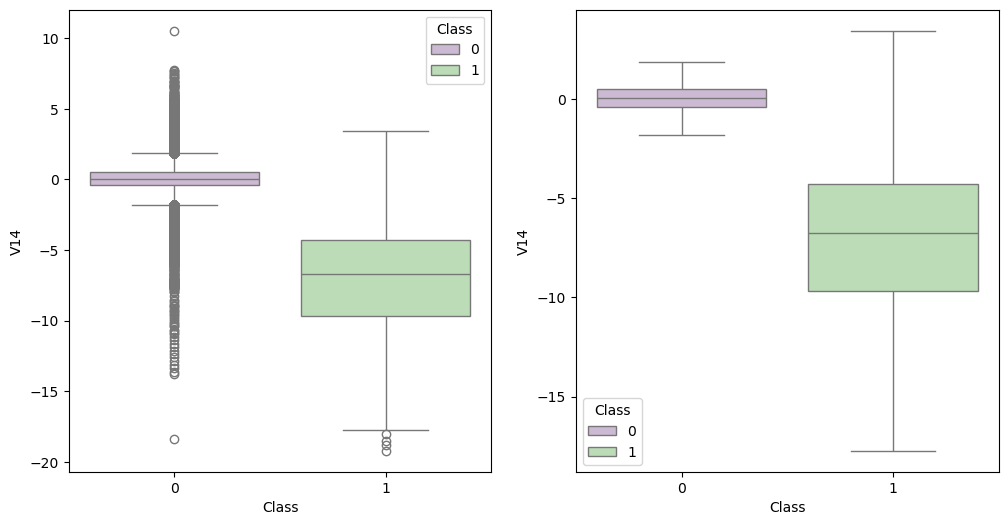

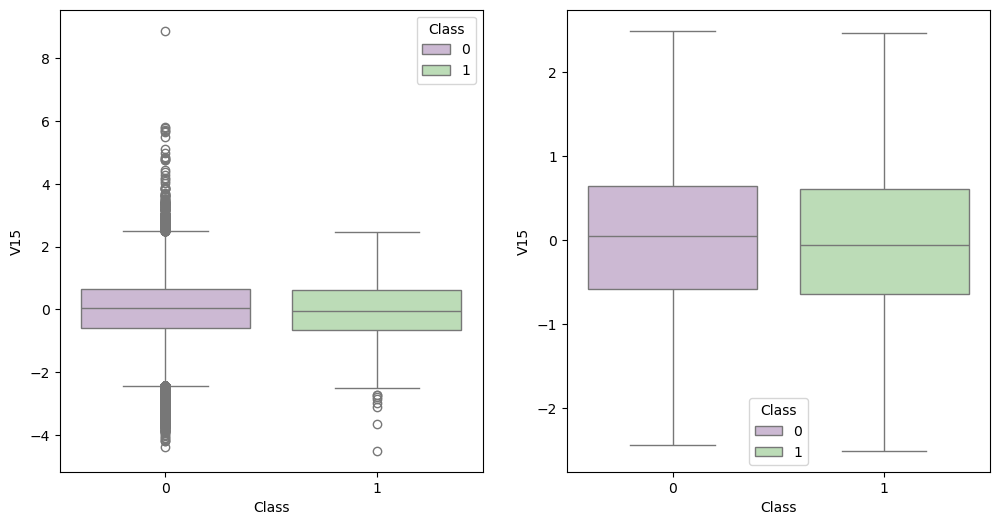

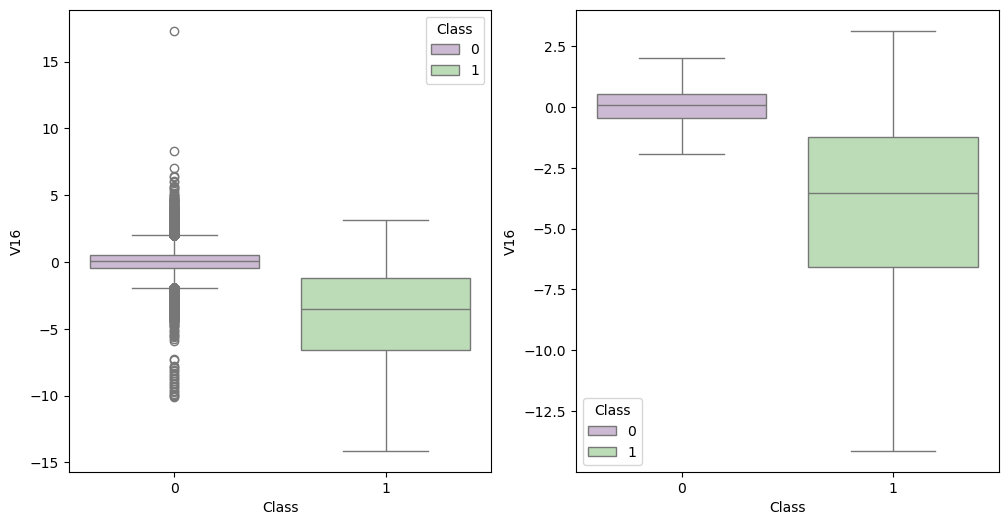

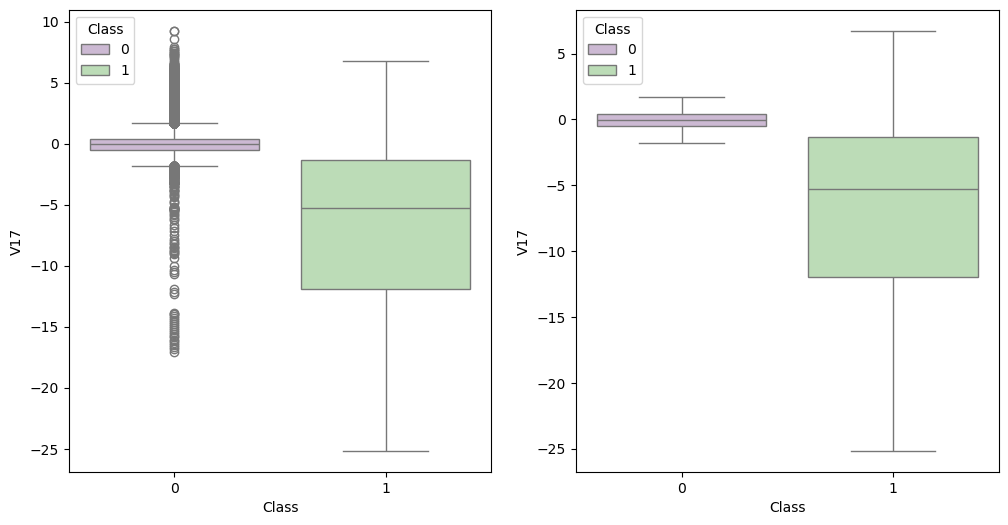

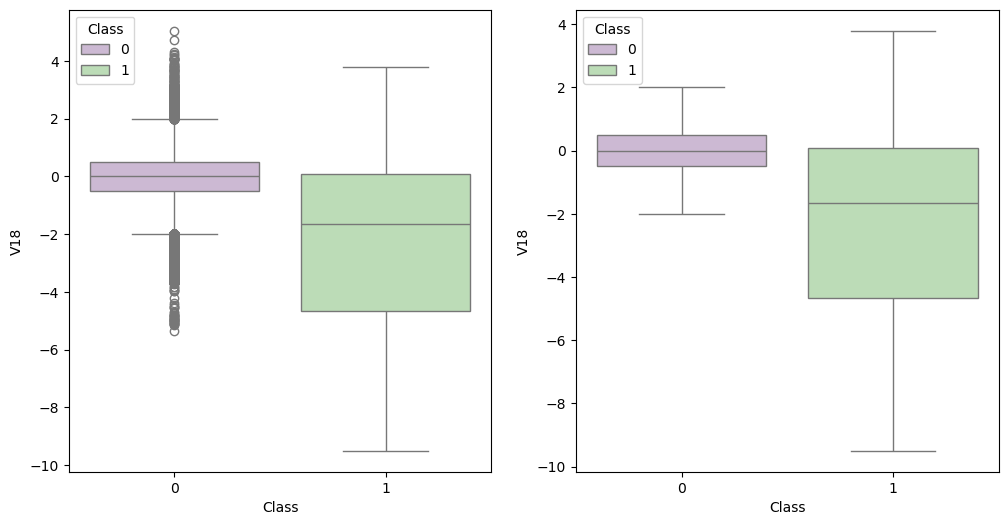

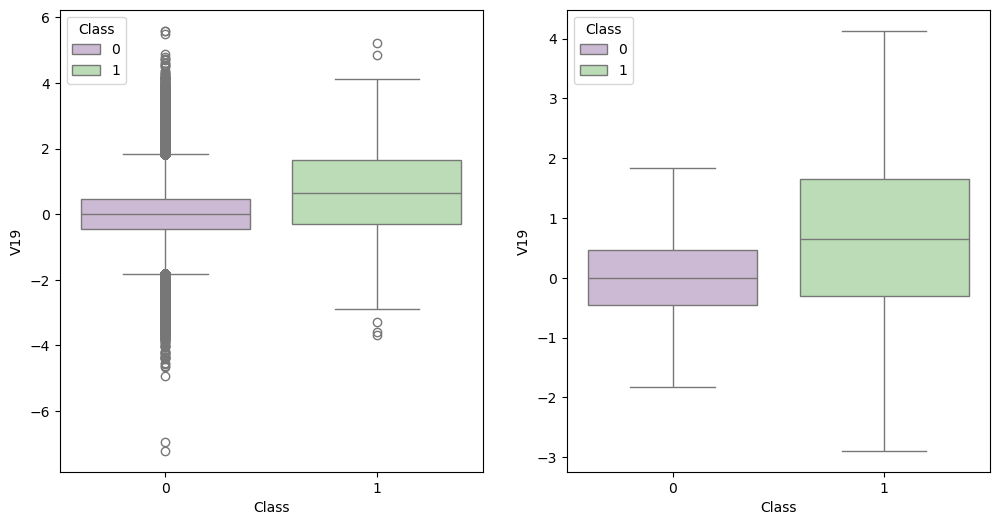

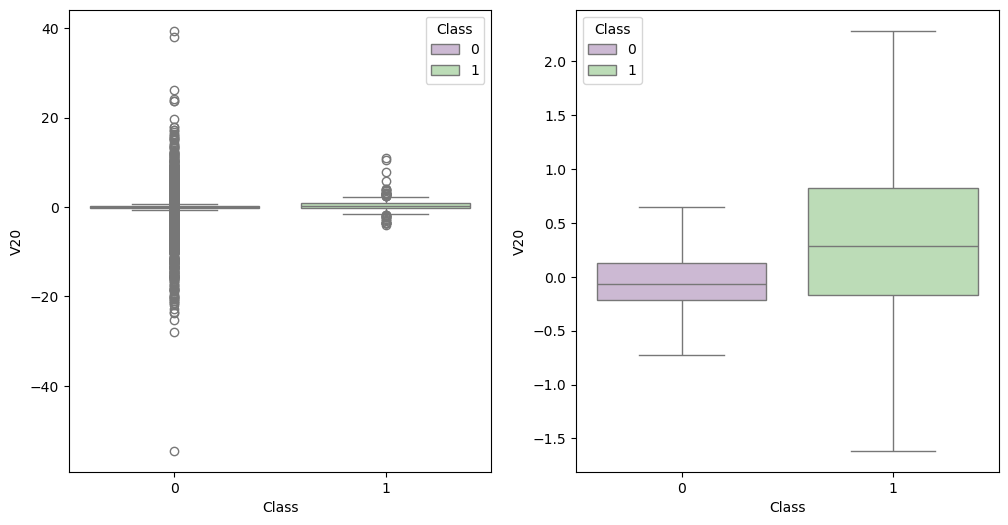

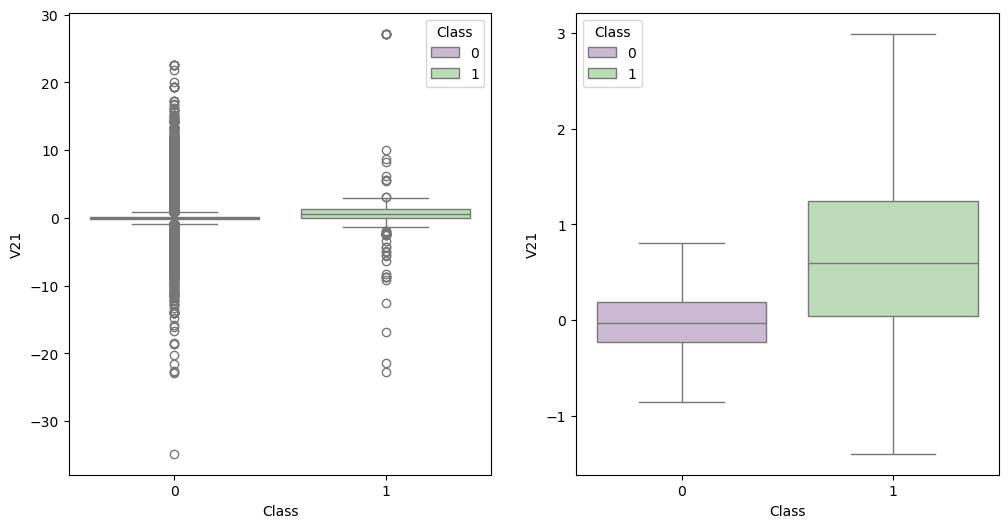

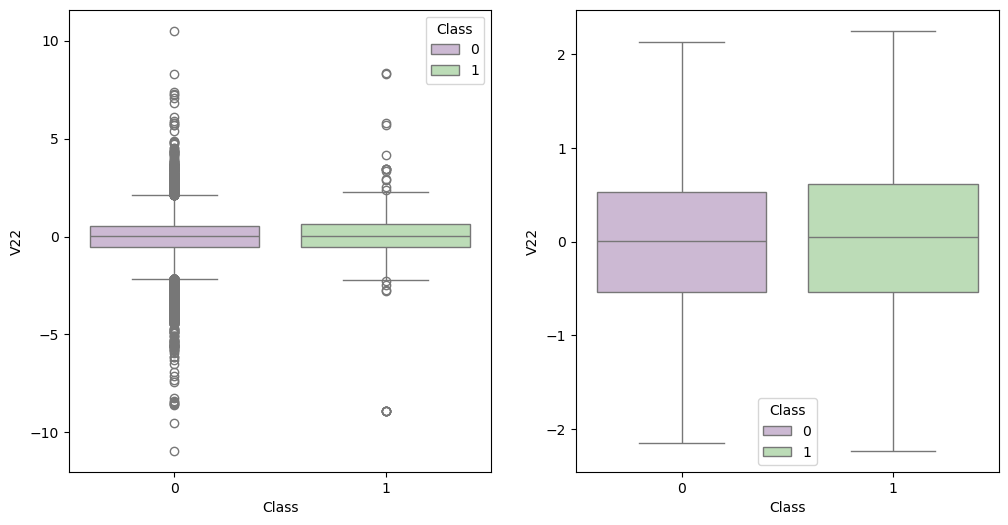

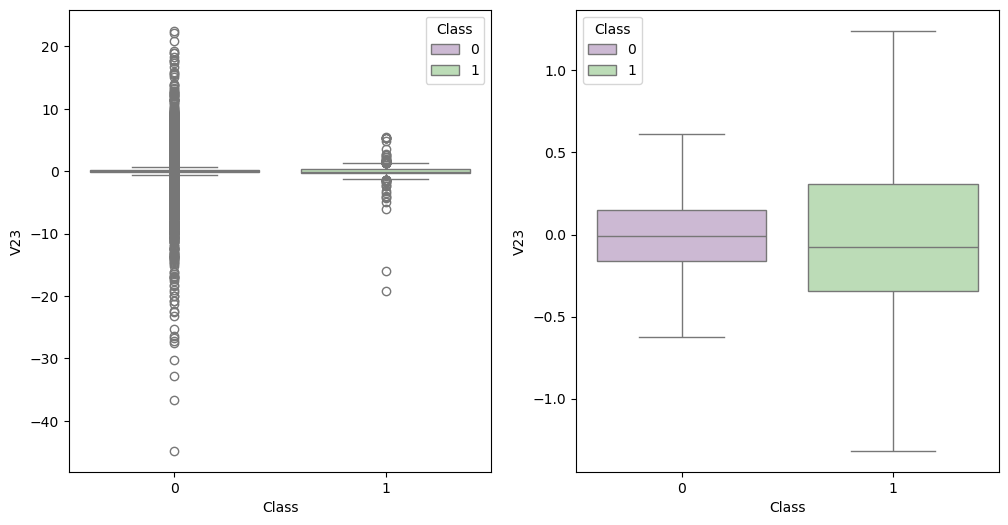

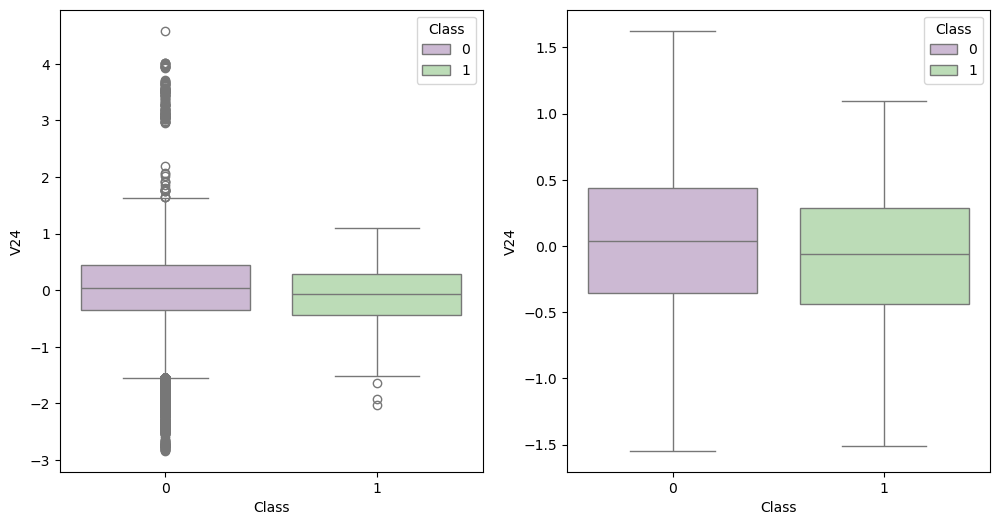

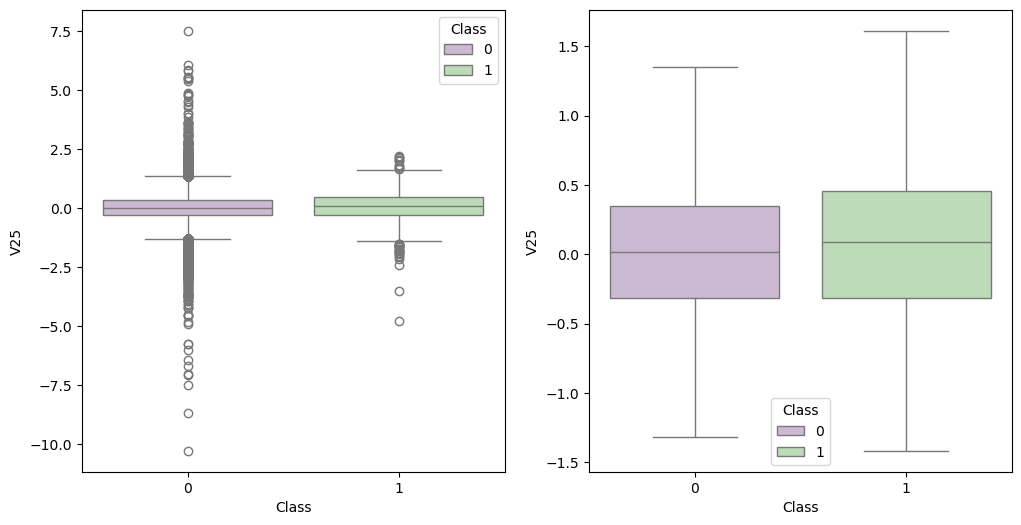

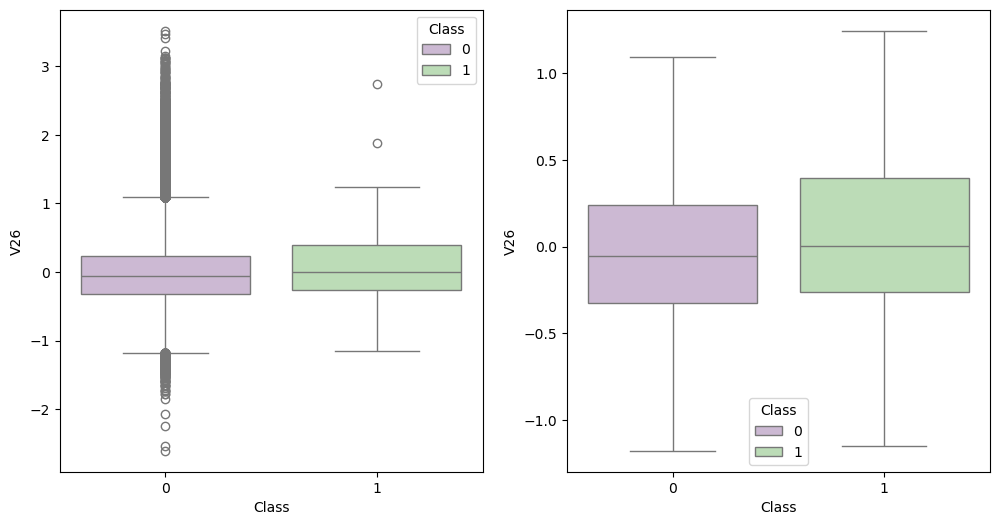

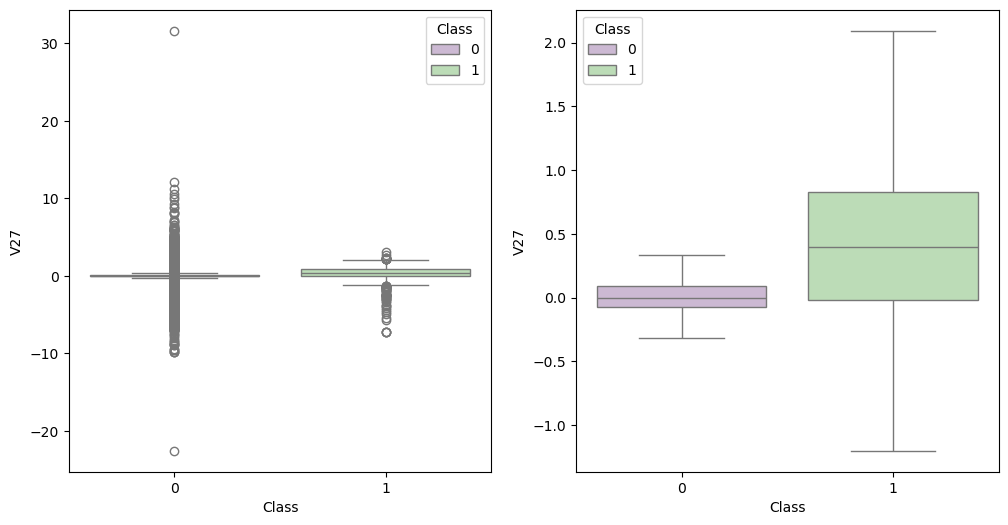

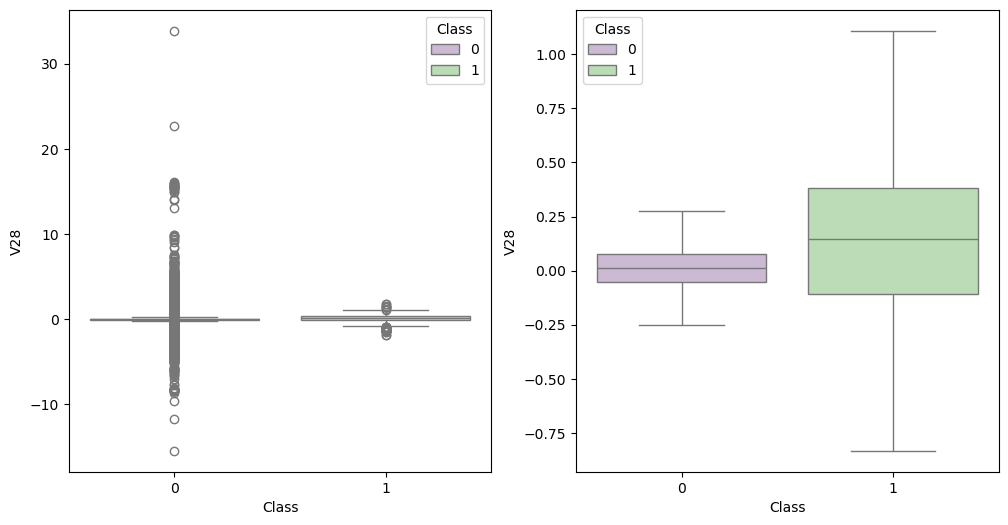

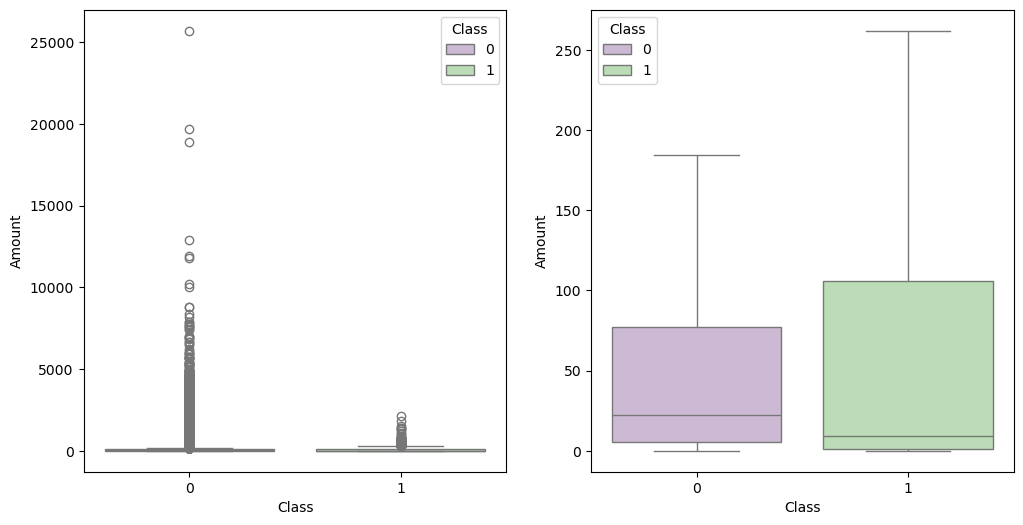

In [13]:
# Transaction amount 
data=train.copy()
data.drop(columns=['Class'], inplace = True)
for i in data.columns:
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
  s = sns.boxplot(ax = ax1, x="Class", y=i, hue="Class",data=train, palette="PRGn",showfliers=True)
  s = sns.boxplot(ax = ax2, x="Class", y=i, hue="Class",data=train, palette="PRGn",showfliers=False)
  plt.show();

Above Box plot say fradulant transaction has more outlier than non fradulant transaction. Since our data is highly imbalance and we have less amount frudulant trasaction so traforming outlier leads to loss of infomation. we will use outlier as it is.

C:\Users\Hp\AppData\Local\Temp\ipykernel_17340\2135852973.py:18: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Hp\AppData\Local\Temp\ipykernel_17340\2135852973.py:19: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Hp\AppData\Local\Temp\ipykernel_17340\2135852973.py:18: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\Hp\AppData\Local\Temp\ipykernel_17340\2135852973.py:19: UserWarning:



The `bw` parameter is deprec

<Figure size 640x480 with 0 Axes>

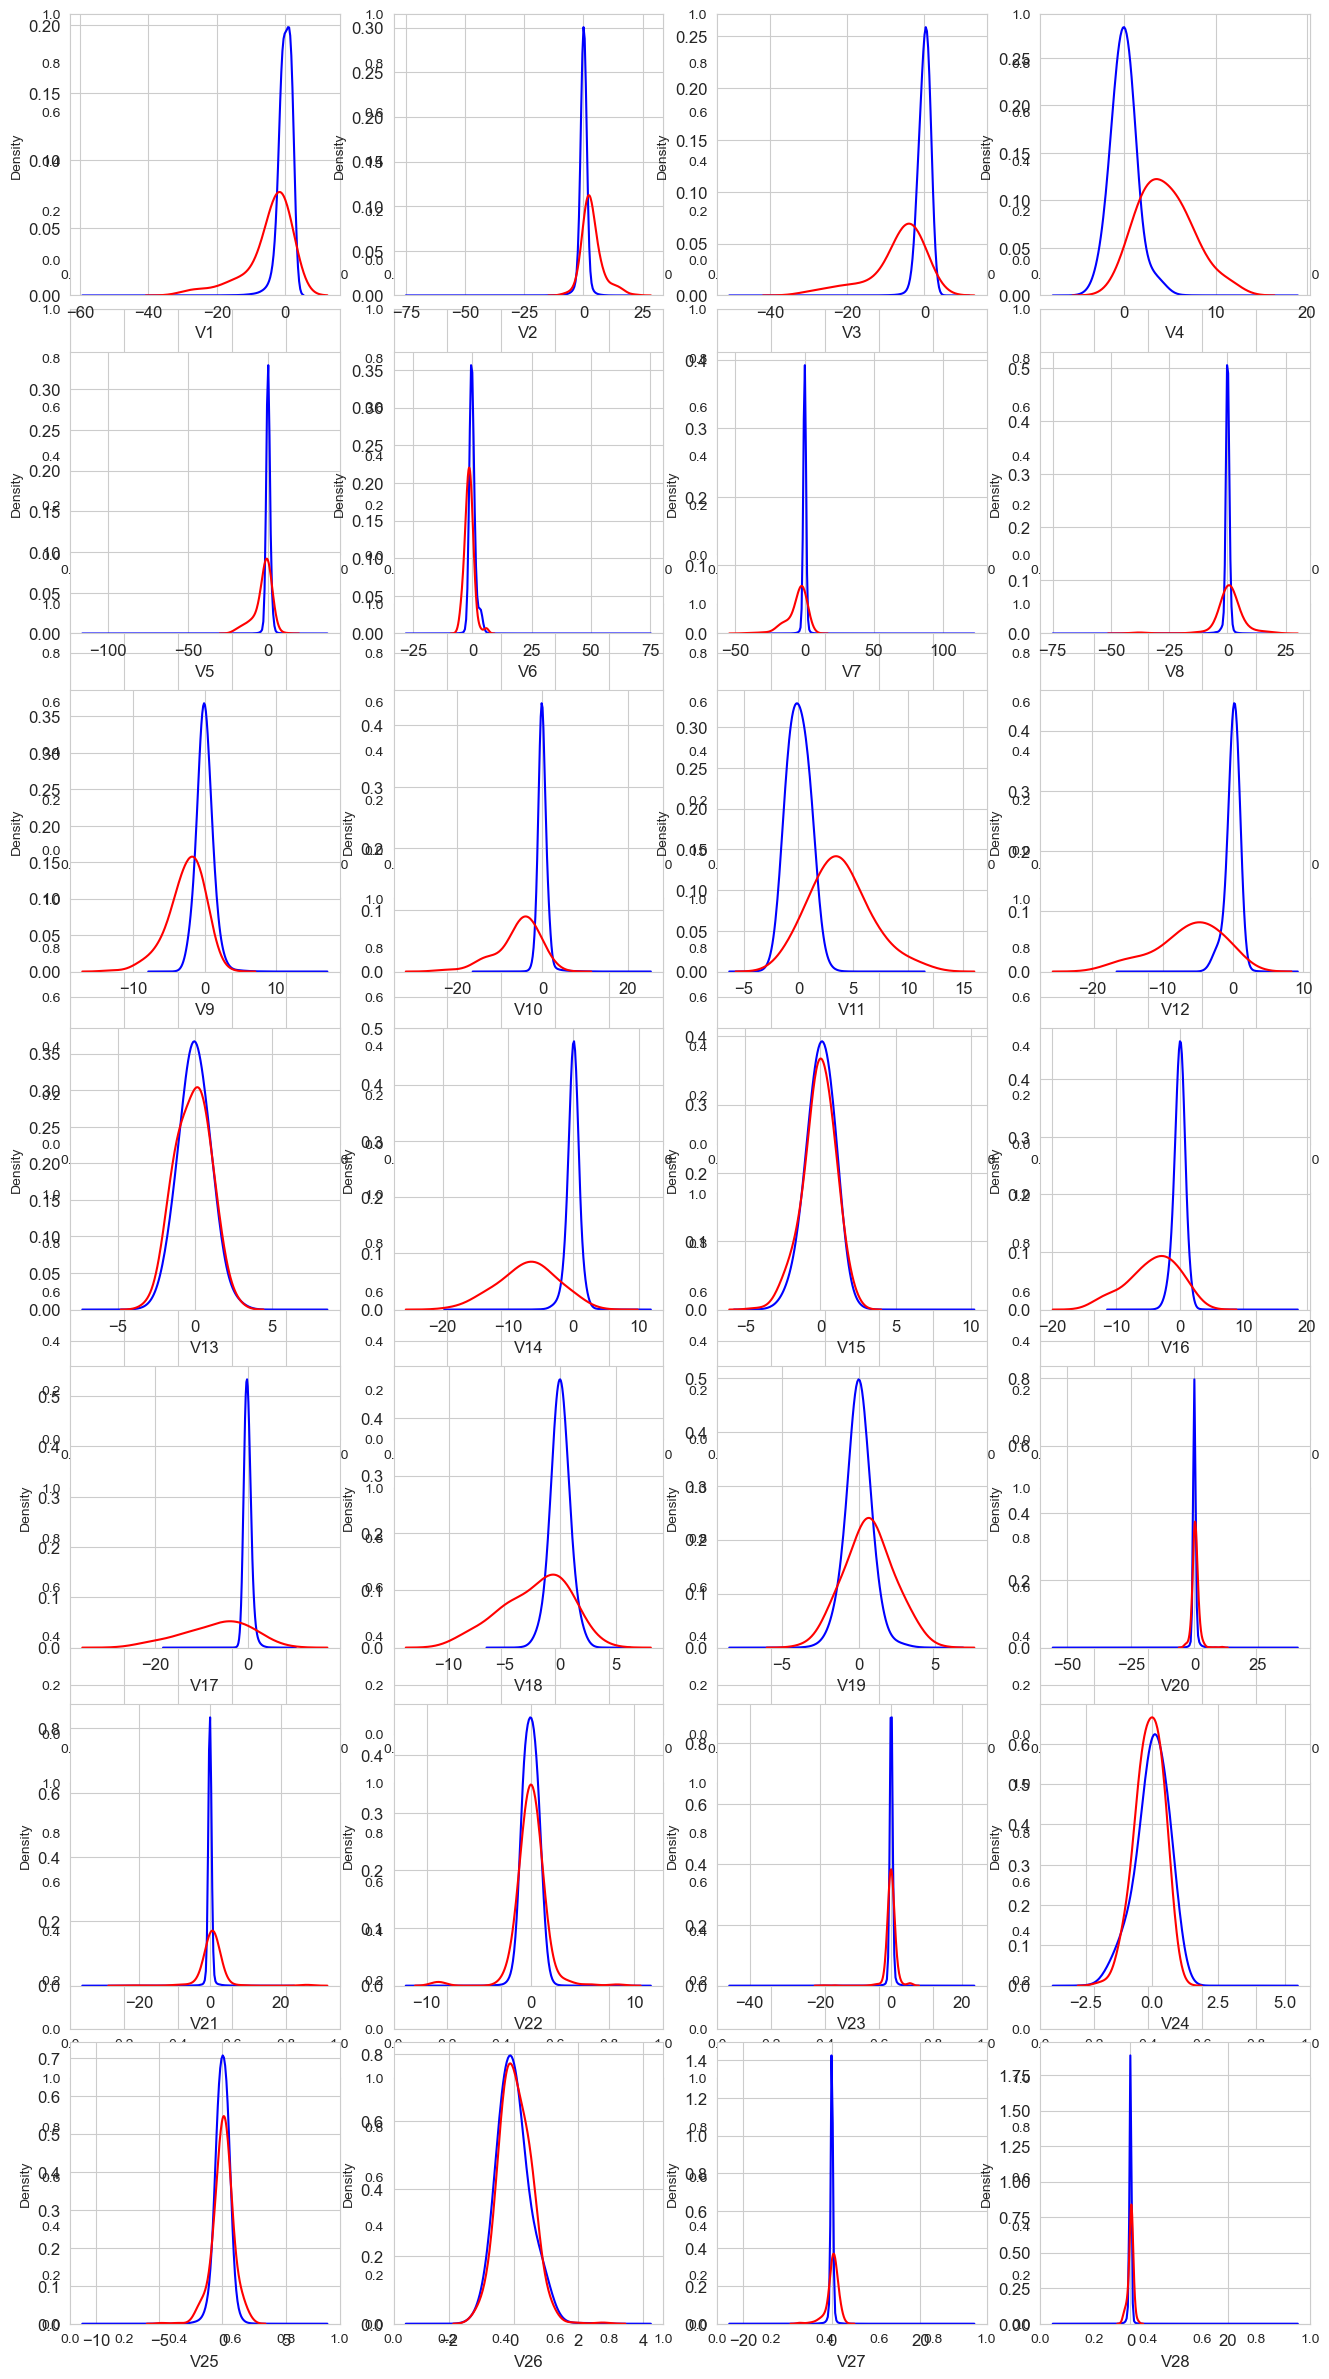

In [14]:
#Features density plot
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", color='b')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1", color='r')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Observation:

* V3, V4, V10, V11, V17-V19 have clearly separated distributions for Class values 0 and 1
* V1, V2, V7, V9, V12, V14, V16, V18 have partially saperated distribution for Class 0 and 1
* V13, V15, ,V20, V22-V28 have almost similar distribution for Class 0 and 1
* V5, V6, V8, V21 have quite similar distribution for Class 0 and 1

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

Text(0.5, 1.0, 'V1-V28 Skewnesses for Class 0')

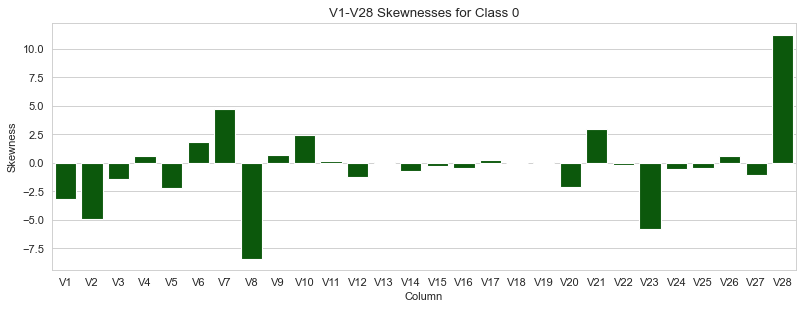

In [15]:
pca_vars = ['V%i' % k for k in range(1,29)]
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=t0[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses for Class 0')

Text(0.5, 1.0, 'V1-V28 Skewnesses for Class 1')

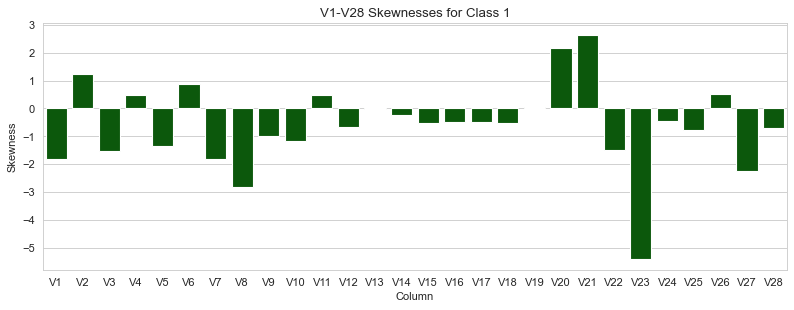

In [16]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=t1[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses for Class 1')

From above plot we can see fradulant transaction has more skewness than normal transaction

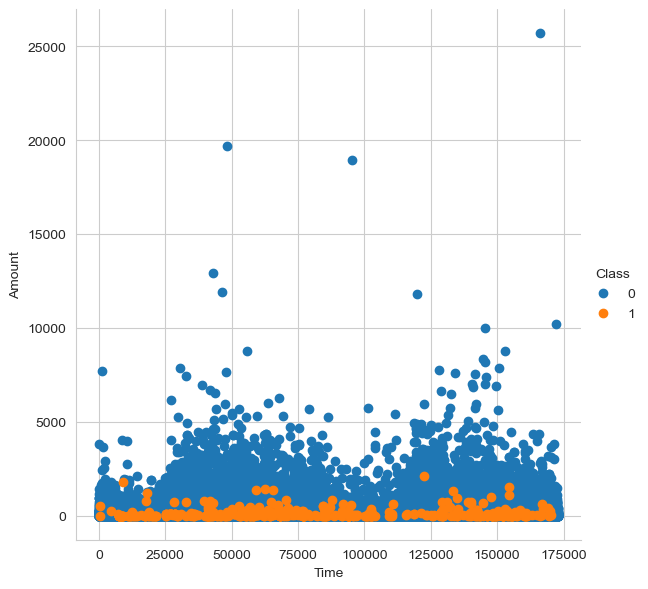

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(train, hue="Class", height = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

## Observations:

* From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
* As per with the time, the frauds in the transactions are evenly distributed throughout time.

In [18]:
FilteredData = train[['Time','Amount', 'Class']]
countLess = FilteredData[FilteredData['Amount'] < 2500]
countMore = train.shape[0] - len(countLess)
percentage = round((len(countLess)/train.shape[0])*100,2)
Class_1 = countLess[countLess['Class'] == 1]
print('Total number for transaction less than 2500 is {}'.format(len(countLess)))
print('Total number for transaction more than 2500 is {}'.format(countMore))
print('{}% of transactions having transaction amount less than 2500' .format(percentage))
print('{} fraud transactions in data where transaction amount is less than 2500' .format(len(Class_1)))

Total number for transaction less than 2500 is 284358
Total number for transaction more than 2500 is 449
99.84% of transactions having transaction amount less than 2500
492 fraud transactions in data where transaction amount is less than 2500


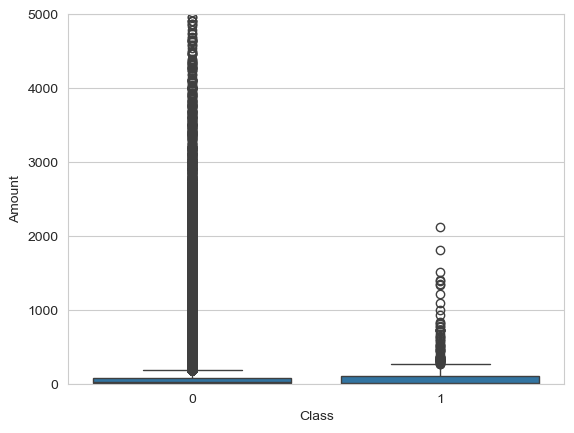

In [19]:
sns.boxplot(x = "Class", y = "Amount", data = train)
plt.ylim(0, 5000)
plt.show()

Observations:

* There are 284358 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500
* total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.
* From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 2500. All of the fraud transactions have transaction amount less than 2500. However, there are many transactions which have a transaction amount greater than 2500 and all of them are genuine.

In [20]:
Amount_0 = train.loc[train['Amount'] == 0]
print(Amount_0['Class'].value_counts())

Class
0    1798
1      27
Name: count, dtype: int64


There are 1,825 transactions that has 0 amount, 27 of them are fraud. One of the observation is 0 pending charge by a person is a verification method to verify the fraud.

## Data Transformation

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler
data1=train.copy()
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train['scaled_amount'] = std_scaler.fit_transform(train['Amount'].values.reshape(-1,1))
train['scaled_time'] = std_scaler.fit_transform(data1['Time'].values.reshape(-1,1))

train.drop(['Amount', 'Time'], axis=1, inplace = True)
scaled_amount = train['scaled_amount']
scaled_time = train['scaled_time']

train.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
train.insert(0, 'scaled_amount', scaled_amount)
train.insert(1, 'scaled_time', scaled_time)
print(train.head())

   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       0.244964    -1.996583 -1.359807 -0.072781  2.536347  1.378155   
1      -0.342475    -1.996583  1.191857  0.266151  0.166480  0.448154   
2       1.160686    -1.996562 -1.358354 -1.340163  1.773209  0.379780   
3       0.140534    -1.996562 -0.966272 -0.185226  1.792993 -0.863291   
4      -0.073403    -1.996541 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.1104

In [22]:
from sklearn.model_selection import train_test_split
X = train.drop(['Class'], axis=1)
Y = train['Class']
# This is explicitly used for with data imbalance
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, Y.shape)

(284807, 30) (284807,)


In [23]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (199364, 30)
X test shape:  (85443, 30)
y train shape:  (199364,)
y test shape:  (85443,)


In [24]:
print(y_test.value_counts())

Class
0    85307
1      136
Name: count, dtype: int64


Handling Data Imbalance

### Step 1: Checking the class distribution
Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


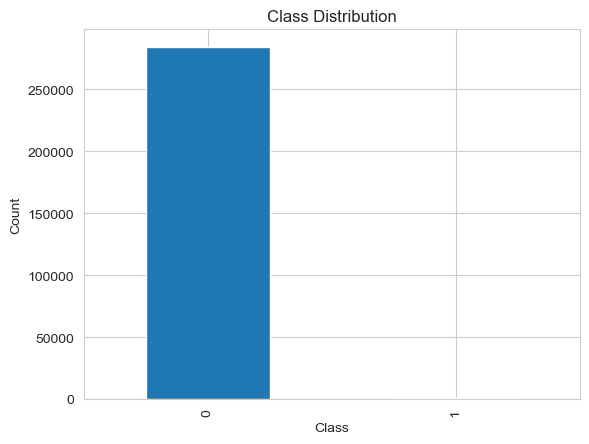


### Step 2: Applying RandomUnderSampler
Class distribution after undersampling:
 Class
0    492
1    492
Name: count, dtype: int64

### Step 3: Applying SMOTE
Class distribution after oversampling (SMOTE):
 Class
0    284315
1    284315
Name: count, dtype: int64

### Step 4: Applying SMOTETomek
Class distribution after SMOTETomek:
 Class
0    284315
1    284315
Name: count, dtype: int64

### Step 5: Training and evaluating the model using undersampled data
Confusion Matrix:
 [[144   6]
 [ 15 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [25]:
# Import necessary libraries
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Checking the class distribution
print("### Step 1: Checking the class distribution")
class_distribution = train['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

# Visualizing the imbalance
class_distribution.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Step 2: Undersampling with RandomUnderSampler
print("\n### Step 2: Applying RandomUnderSampler")
X = train.drop(columns=['Class'])
y = train['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Checking new class distribution after undersampling
print("Class distribution after undersampling:\n", pd.Series(y_resampled).value_counts())

# Step 3: Oversampling with SMOTE
print("\n### Step 3: Applying SMOTE")
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Checking new class distribution after oversampling
print("Class distribution after oversampling (SMOTE):\n", pd.Series(y_resampled_smote).value_counts())

# Step 4: Combined Approach with SMOTETomek
print("\n### Step 4: Applying SMOTETomek")
smotetomek = SMOTETomek(random_state=42)
X_resampled_combined, y_resampled_combined = smotetomek.fit_resample(X, y)

# Checking class distribution after SMOTETomek
print("Class distribution after SMOTETomek:\n", pd.Series(y_resampled_combined).value_counts())

# Step 5: Train and evaluate the model using undersampled data
print("\n### Step 5: Training and evaluating the model using undersampled data")
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Hyperparameter Tuning

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 6: Hyperparameter tuning using GridSearchCV
print("\n### Step 6: Hyperparameter tuning with GridSearchCV")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='f1',
                           verbose=2, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
print("\n### Step 7: Evaluating the tuned model")
y_pred_best = best_model.predict(X_test)

print("Confusion Matrix (Tuned Model):\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))



### Step 6: Hyperparameter tuning with GridSearchCV
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

### Step 7: Evaluating the tuned model
Confusion Matrix (Tuned Model):
 [[144   6]
 [ 16 130]]
Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       150
           1       0.96      0.89      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



# Model Building

## Model training with Entire dataset

Now we're ready to build machine learning models to predict whether a transaction is fraudulent. We'll train the following models:

* Logistic regression
* Support vector classifier
* Desicision Tree
* Random forest
* Bagging classifier

In [27]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [28]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(n_estimators=10, random_state=0),
    "SGDClassifier" : SGDClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "xgb" : XGBClassifier()
}

In [29]:
def plot(df):
  fraud = df[df['class']==1]
  normal = df[df['class']==0]
  fraud.drop(['class'],axis=1,inplace=True)
  normal.drop(['class'],axis=1,inplace=True)
  fraud = fraud.set_index('classifier')
  normal = normal.set_index('classifier')
  plt.figure(figsize = (8,2))
  sns.heatmap(fraud.iloc[:, :], annot=True, cmap=sns.light_palette((210, 90, 60), input="husl"),linewidth=2)
  plt.title('class 1')
  plt.show()
  plt.figure(figsize = (8,2))
  sns.heatmap(normal.iloc[:, :], annot=True, cmap=sns.light_palette((210, 90, 60), input="husl"),linewidth=2)
  plt.title('class 0')
  plt.show()

In [30]:
def roc_curve(y_test, rdict):
  sns.set_style('whitegrid')
  plt.figure()
  i=0
  fig, ax = plt.subplots(4,2,figsize=(16,30))
  for key,val in rdict.items():
    fpr, tpr, thresholds = metrics.roc_curve( y_test, val,
                                                  drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_test, val)
    i+= 1
    plt.subplot(4,2,i)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(key)
    plt.legend(loc="lower right")
  plt.show()

In [31]:
def training(models, x, y, x_t, y_t):
    conf = []
    comp = []
    rdict = {}
    for key, model in models.items():
      model = model.fit(x, y)
      y_pred = model.predict(x_t)
      rdict[key] = y_pred
      tn, fp, fn, tp = confusion_matrix(y_t, y_pred).ravel()
      precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_t, y_pred)
      r1 = {'Classifier': key, 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
      conf.append(r1)
      MCC = matthews_corrcoef(y_t, y_pred)
      AUROC = roc_auc_score(y_t, y_pred)
      Cohen_kappa = cohen_kappa_score(y_t, y_pred)
      accuracy = metrics.accuracy_score(y_t, y_pred)
      r2 = {'classifier': key,'matthews_corrcoef':MCC,'Cohen_kappa':Cohen_kappa,'accuracy': accuracy,'AUROC':AUROC, 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
      r3 = {'classifier': key,'matthews_corrcoef':MCC,'Cohen_kappa':Cohen_kappa,'accuracy': accuracy,'AUROC':AUROC, 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
      comp.append(r2)
      comp.append(r3)
    r11 = (pd.DataFrame(conf).to_markdown())
    r12 = pd.DataFrame(comp)
    print(f'\n\nRoc curve \n\n')
    roc_curve(y_t, rdict)
    print(f'\n\n confusion matrixs comparison \n\n')
    print(r11)
    print(f'\n\n Performance comparison \n\n')
    plot(r12)
    



Roc curve 




<Figure size 640x480 with 0 Axes>

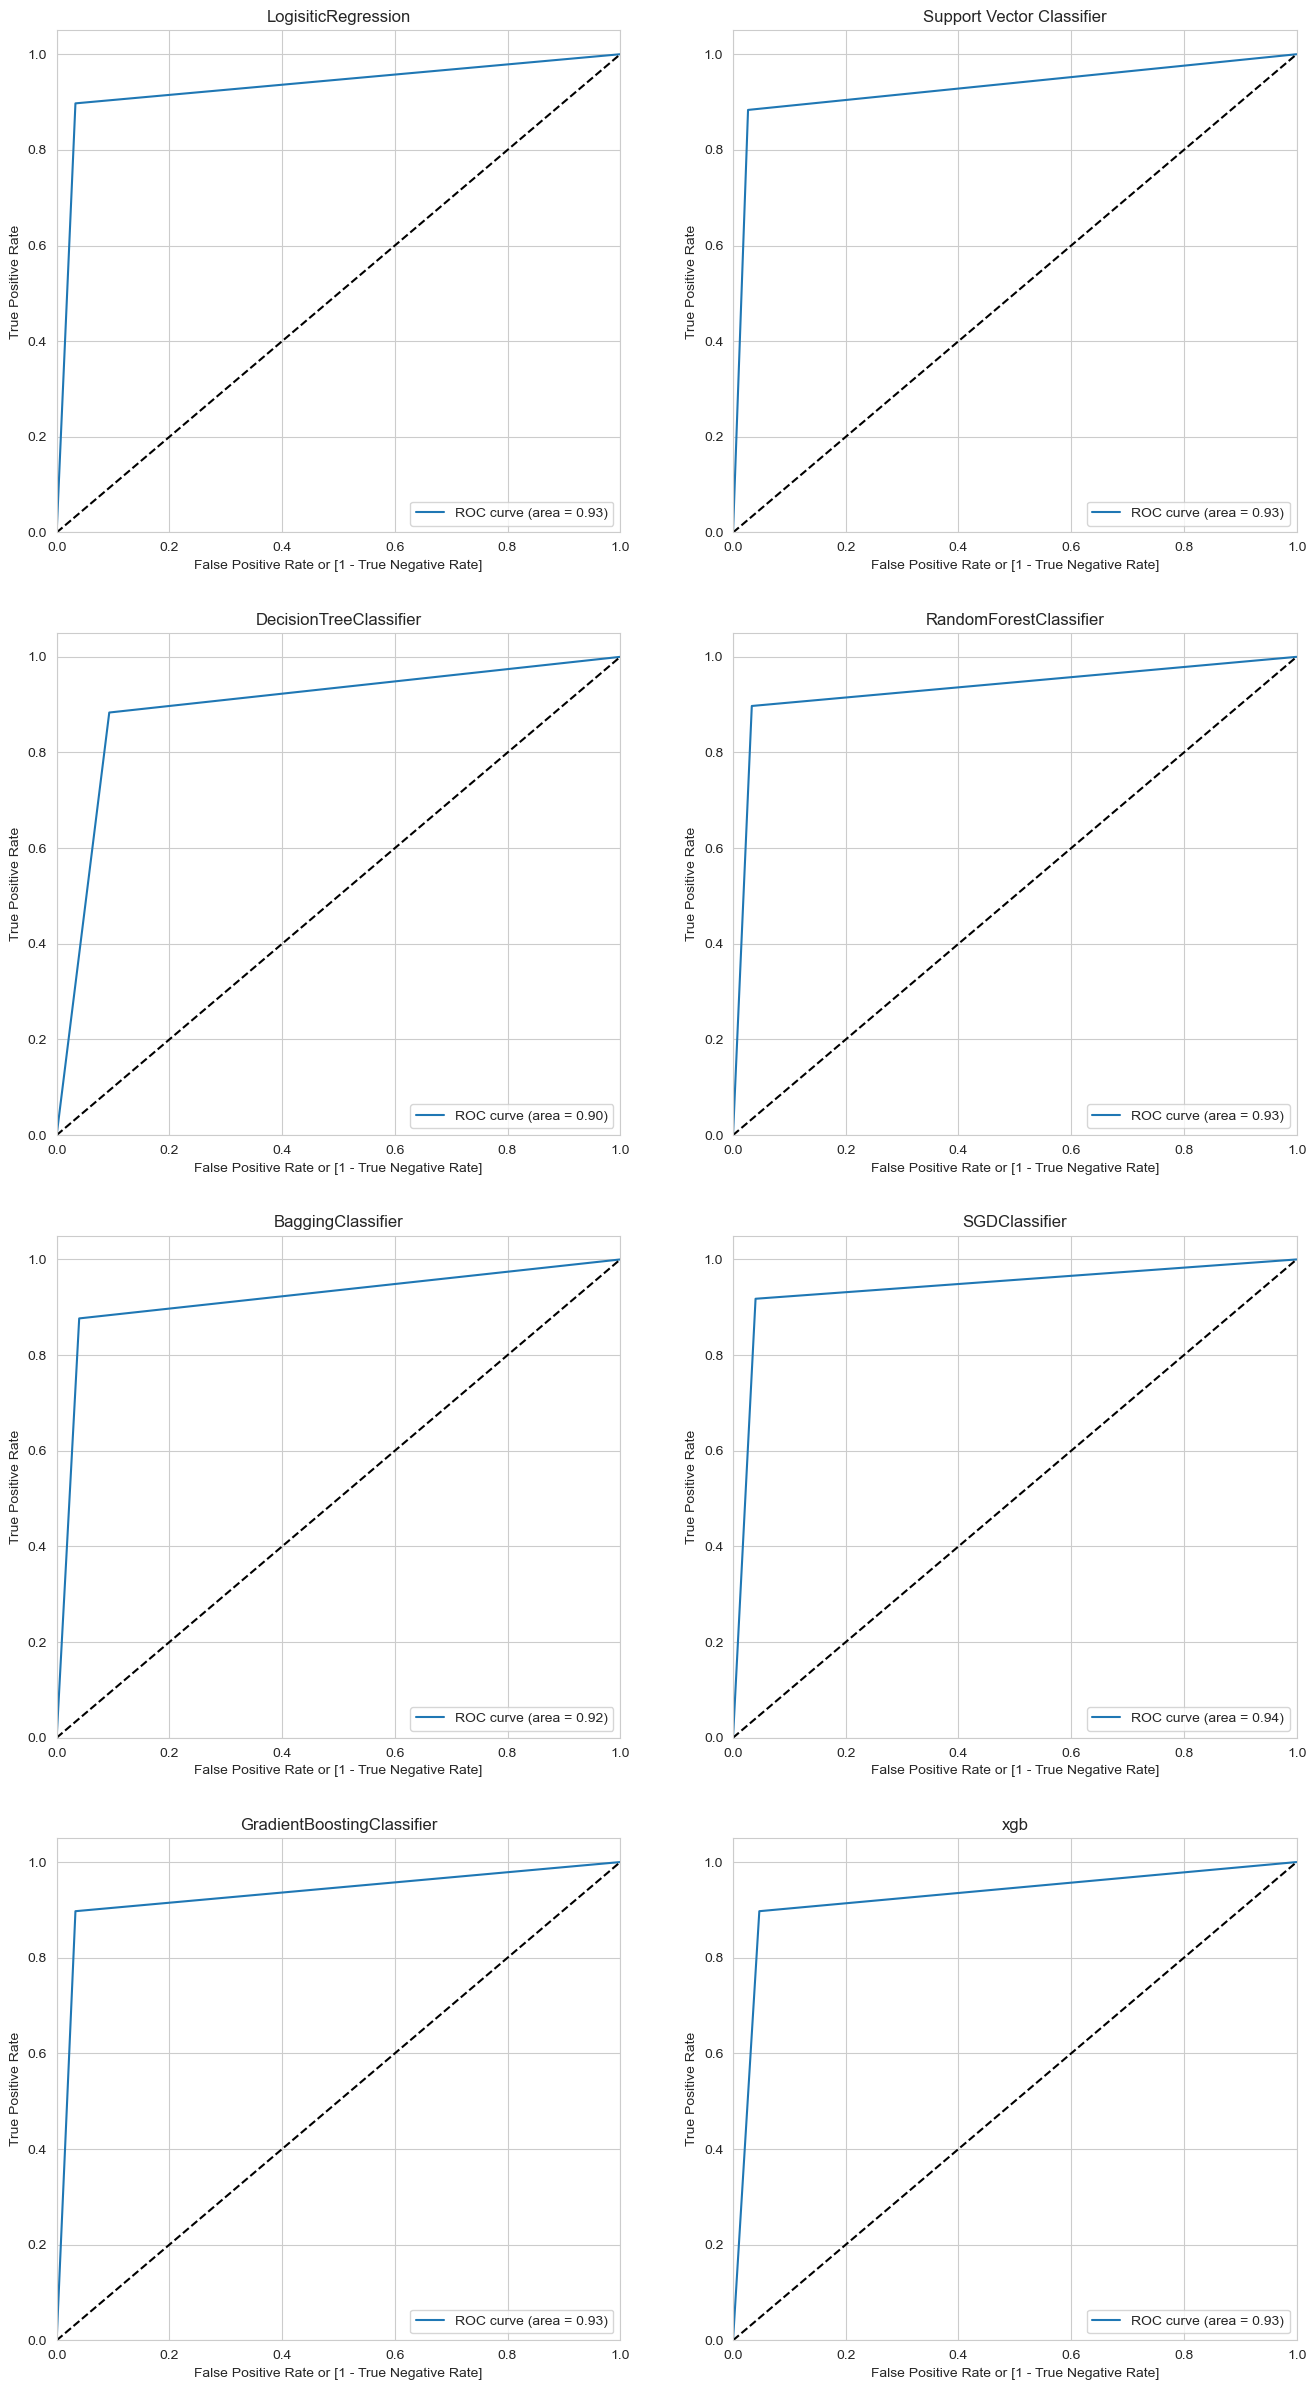



 confusion matrixs comparison 


|    | Classifier                 |   TN |   TP |   FN |   FP |
|---:|:---------------------------|-----:|-----:|-----:|-----:|
|  0 | LogisiticRegression        |  145 |  131 |   15 |    5 |
|  1 | Support Vector Classifier  |  146 |  129 |   17 |    4 |
|  2 | DecisionTreeClassifier     |  136 |  129 |   17 |   14 |
|  3 | RandomForestClassifier     |  145 |  131 |   15 |    5 |
|  4 | BaggingClassifier          |  144 |  128 |   18 |    6 |
|  5 | SGDClassifier              |  144 |  134 |   12 |    6 |
|  6 | GradientBoostingClassifier |  145 |  131 |   15 |    5 |
|  7 | xgb                        |  143 |  131 |   15 |    7 |


 Performance comparison 




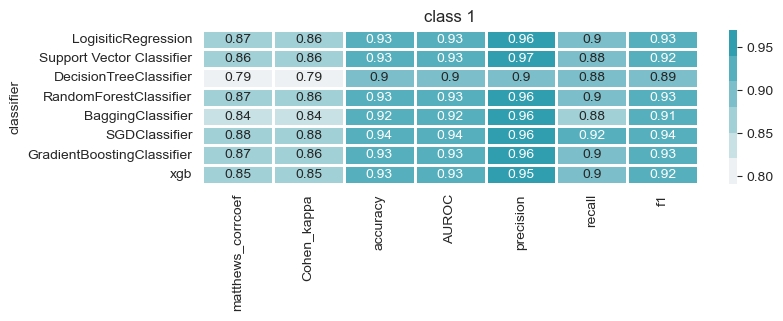

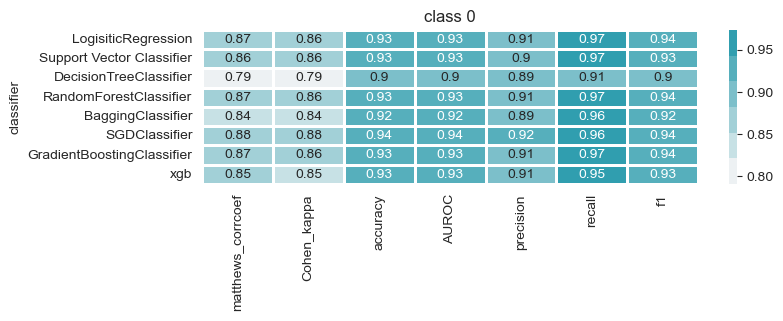

In [32]:
training(classifiers, X_train, y_train, X_test, y_test)

## Model Training with only selected feature

In [33]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
featureScores_df = featureScores.sort_values(['Score', 'Specs'], ascending=[False, True])  #naming the dataframe columns
print(featureScores_df)

            Specs         Score
18            V17  33979.168593
15            V14  28695.547788
13            V12  20749.822361
11            V10  14057.979985
17            V16  11443.349428
4              V3  11014.508305
8              V7  10349.605408
12            V11   6999.355047
5              V4   5163.832114
19            V18   3584.380605
2              V1   2955.668946
10             V9   2746.600273
6              V5   2592.357929
3              V2   2393.401678
7              V6    543.510578
22            V21    465.916251
20            V19    344.990997
21            V20    114.999731
9              V8    112.548287
28            V27     88.045296
1     scaled_time     43.252998
29            V28     25.901405
25            V24     14.850932
0   scaled_amount      9.033345
14            V13      5.947672
27            V26      5.653653
16            V15      5.080193
26            V25      3.116062
24            V23      2.053476
23            V22      0.184706


In [34]:
col = ['V17', 'V14', 'V12','V10','V16','V3','V7','V11','V4','V18','V1','V9','V5','V2','V6','V21','V19','V20','V8','V27','scaled_time','V28','V24']



Roc curve 




<Figure size 640x480 with 0 Axes>

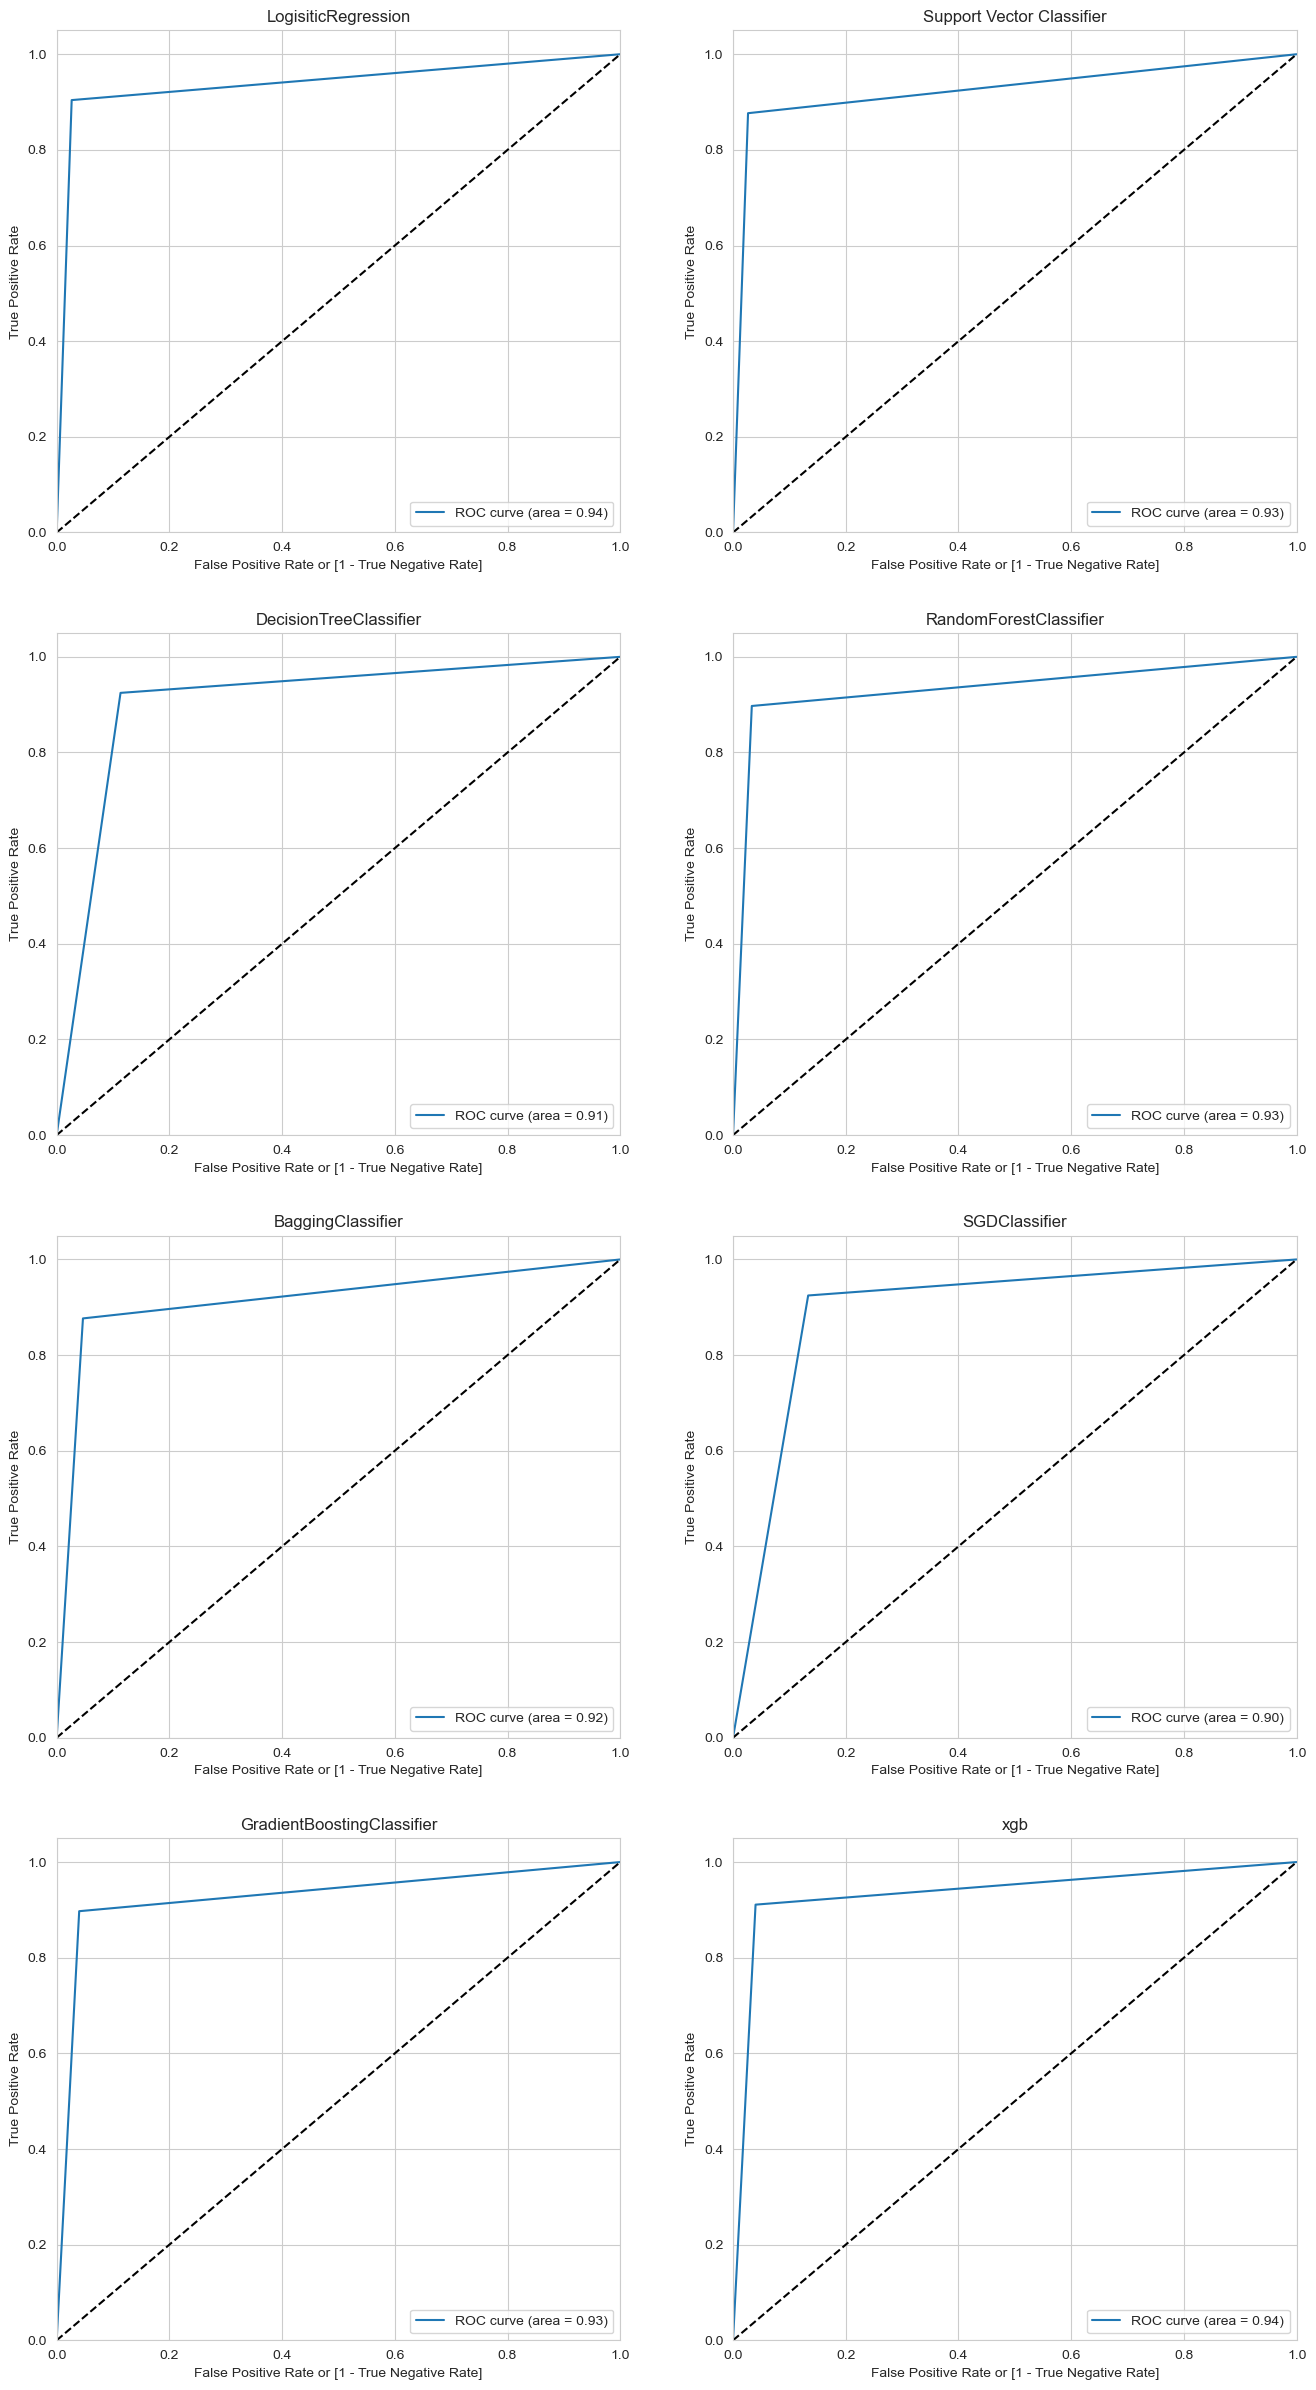



 confusion matrixs comparison 


|    | Classifier                 |   TN |   TP |   FN |   FP |
|---:|:---------------------------|-----:|-----:|-----:|-----:|
|  0 | LogisiticRegression        |  146 |  132 |   14 |    4 |
|  1 | Support Vector Classifier  |  146 |  128 |   18 |    4 |
|  2 | DecisionTreeClassifier     |  133 |  135 |   11 |   17 |
|  3 | RandomForestClassifier     |  145 |  131 |   15 |    5 |
|  4 | BaggingClassifier          |  143 |  128 |   18 |    7 |
|  5 | SGDClassifier              |  130 |  135 |   11 |   20 |
|  6 | GradientBoostingClassifier |  144 |  131 |   15 |    6 |
|  7 | xgb                        |  144 |  133 |   13 |    6 |


 Performance comparison 




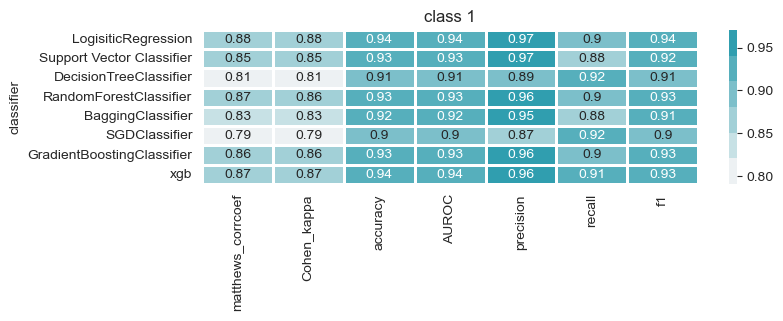

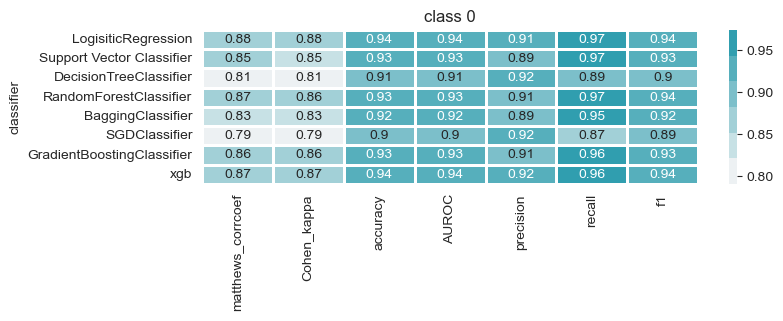

In [35]:
training(classifiers, X_train[col], y_train, X_test[col], y_test)

## **Conclusion**

* The performance of the model slightly increased after removing the few parameters like Amount, V13, V15, V22, V23, V25.
* XGB classifier performed much better than the rest all the algorithm without any hyperparameter tweaking!

In [36]:
xgb = XGBClassifier()
# X_train[col], y_train, X_test[col], y_test
xgb.fit(X_train[col],y_train)
y_pred_final = xgb.predict(X_test[col])

In [37]:
import joblib
# Step 8: Model Deployment Plan
print("\n### Step 8: Model Deployment Plan")
# Save the trained model
model_filename = "fraud_detection_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")



### Step 8: Model Deployment Plan
Model saved as fraud_detection_model.pkl
